<span style="background-color:cyan; color:navy; font-size:30px;">Author: Nikolin Prenga <br> Date: November 2024</span>


<span style="background-color:yellow; color:green; font-size:30px;">This code was developed as part of an article published on LinkedIn, with the intention of helping others understand the basic principles of Principal Component Analysis (PCA). Feel free to explore, use, or draw inspiration from this implementation. <br> This code is intended for data scientists, students, and anyone interested in understanding PCA</span>






<span style="color:blue; font-size:25px">Import necessary libraries</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cv2
import os
import numpy as np
import plotly.graph_objects as go
import imageio
%matplotlib inline
import plotly.express as px
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  # Import LinearRegression

from sklearn.datasets import fetch_openml

warnings.filterwarnings("ignore")





<span style="background-color:yellow; color:navy; font-size:35px;">Importing Mice Protein Expression dataset from scikit-learn library</span>


In [2]:
data_x= fetch_openml('miceprotein')
X_x = data_x.data
y = data_x.target

features = [target for target in data_x.feature_names]
# Make a temporary dataframe for the dataset

dff = pd.DataFrame(X_x, columns=features)

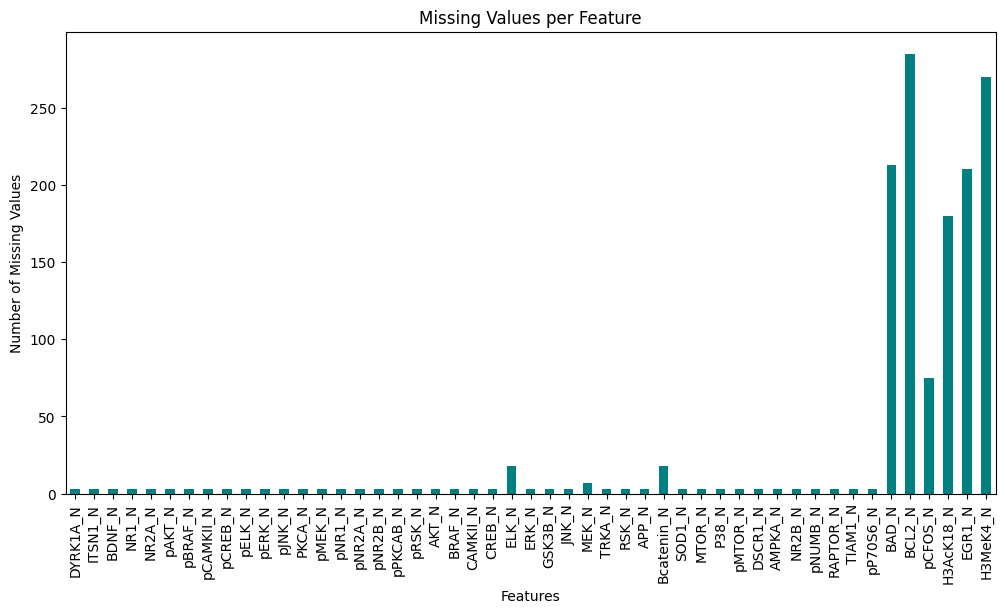

In [3]:
# Count missing values per feature
missing_counts = dff.isnull().sum()

# Filter out features with no missing values 
missing_counts = missing_counts[missing_counts > 0]

# Plot
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', color='teal')
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()



<span style="color:navy; font-size:30px">Remove features with more than 178 missing values</span>



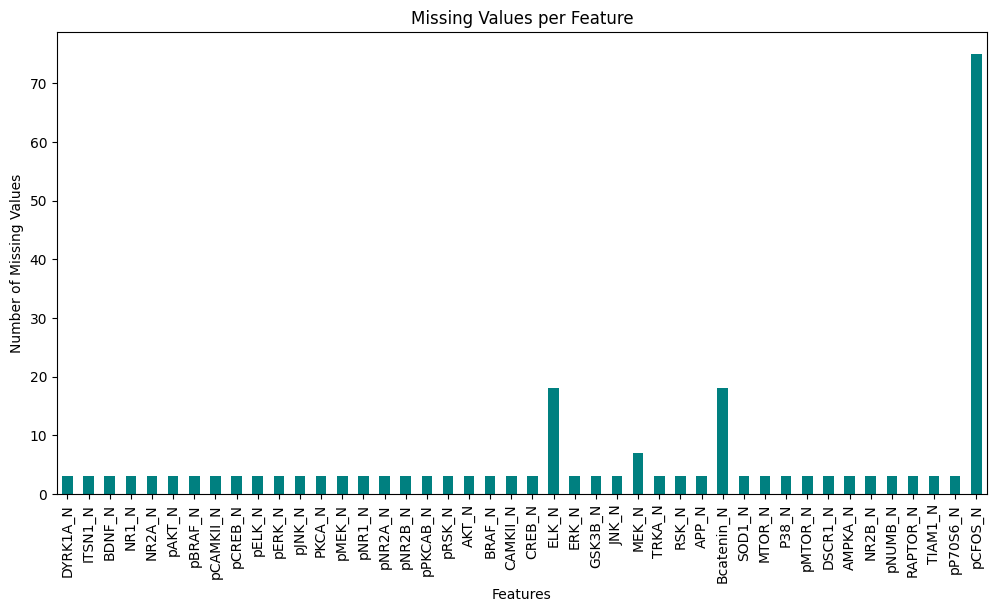

In [4]:
df_cleaned = dff.dropna(thresh=len(dff) - 178, axis=1)


missing_counts_first_stage = df_cleaned.isnull().sum()

# Filter out features with no missing values (optional)
missing_counts_first_stage = missing_counts_first_stage[missing_counts_first_stage > 0]

# Plot
plt.figure(figsize=(12, 6))
missing_counts_first_stage.plot(kind='bar', color='teal')
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


<span style="color:navy; font-size:30px">Impute missing values in features with their respective means</span>
<span style="color:navy; font-size:30px">Obtain a cleaned dataset with no missing values and retain feature names</span>



In [5]:
# data_x= fetch_openml('miceprotein')
# X_x = data_x.data
# y = data_x.target
# features = [target for target in data_x.feature_names]
# dff = pd.DataFrame(X_x, columns=features)
# df_cleaned = dff.dropna(thresh=len(dff) - 178, axis=1)


# #df_cleaned= df_cleaned.drop(index=[987, 988, 989])


X = df_cleaned.apply(lambda col: col.fillna(col.mean()) if col.isnull().any() else col, axis=0)

target_names =[ name for name in set(y)]


features =list(X.columns)

In [6]:
## Load the data alternatively
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls"
#data_alternative = pd.read_excel(url)



In [7]:
X.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...  pCASP9_N   PSD95_N    SNCA_N  \
0   2.373744  0.232224  1.750936  ...  1.603310  2.014875  0.108234   
1   2.292150  0.226972  1.596377  ...  1.671738  2.004605  0.109749   
2   2.283337  0.230247  1.561316  ...  1.663550  2.016831  0.108196   
3   2.152301  0.207004  1.595086  ...  1.484624  1.957233  0.119883   
4   2.134014  0.192158  1.504230  ...  1.534835  2.009109  0.119524   

   Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     pS6_N   pCFOS_N     SYP_N  \
0     1.044979         0.831557  0.188852  0.106305  0.108336  0.427099   
1     1.009883         0.849270  0.200404  0.106592  0.104315  0.441581   
2     0.996848         0.846709  0.193685  0.108303  0.106219  0.435777   
3     0.990225         0.833277  0.192112  0.103184  0.111262  0.391691   
4     0.997775         0.878668  0.205604  0.104784  0.110694  0.434154   

     CaNA_N  
0  1.675652  
1  1.743610  
2  1.926427  
3  1.700563  
4  1.839730  

[5 rows x 72 columns]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      


<span style="color:navy; font-size:24px">Import the pseudocode for implementing Principal Component Analysis (PCA)  <br> using eigenvalue decomposition in this notebook </span>



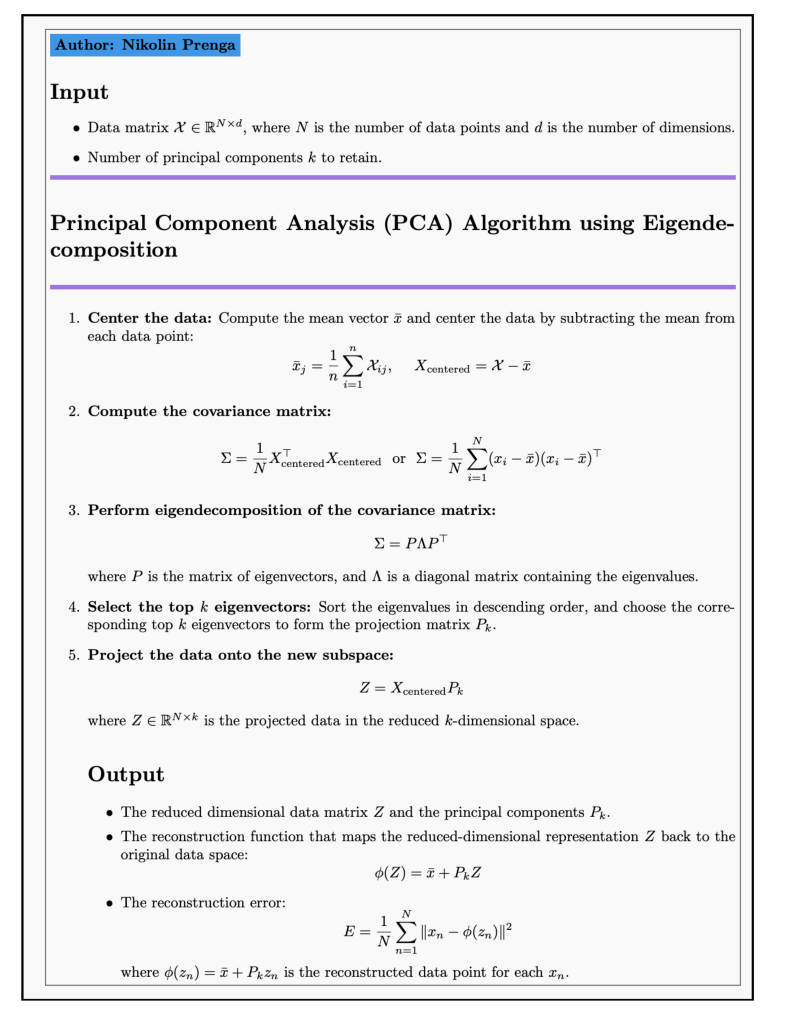

In [9]:
im = cv2.imread('EigenNikolin.png')

plt.figure(figsize=( 10,18))
plt.imshow(im)
plt.axis('off')
plt.show()



<span style="color:navy; font-size:24px">Implementing the PCA following closely the pseudoalgorithm</span>


In [10]:
class Nikolin_PCA_eigen_valuesDecomposition(object):
    def __init__(self, dataset, n_components, target =False,  col_names=False, target_names=False):
        self.dataset =dataset
        self.n_components = n_components
        self.col_names = col_names
        self.target_names = target_names
        self.target = target

    # Step 1 in the algorithm  centering the data
    def center_the_data(self):
        mean = np.mean(self.dataset, axis=0)
        centered_data = self.dataset - mean
        return centered_data, mean

    # Step 2 in the algorithm computing the covariance matrix
    def compute_covariance_matrix(self):
        cov_matrix = np.cov(self.dataset, rowvar=False )
        return cov_matrix
    
    # Step 3 in the algorithm Performing eigendecomposition of the covariance matrix:
    def eigen_decomposition(self):
        cov_matrix = self.compute_covariance_matrix()
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        return eigenvalues, eigenvectors
    
    # Step 4 in the algorithm sorting the eigenvalues in descending order,
    # and choose the corresponding top k eigenvectors to form the projection matrix Pk
    def select_k_eigenvectors(self):
        eigenvalues, P = self.eigen_decomposition()

        decenting_index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[decenting_index]
        P_k = P[:, decenting_index]
        P_k = P_k[:, :self.n_components]
        eigenvalues_k = eigenvalues[ : self.n_components]
        return eigenvalues_k, P_k

    # Step 5 in the algorith projecting the data onto the new subspace
    def projected_data(self):
        centered_data, _ = self.center_the_data()
        _, P_k = self.select_k_eigenvectors()
        Z = np.dot(centered_data, P_k)
        return Z

    # The reduced dimensional data matrix Z and the principal components P_k
    # The reconstruction function  and the The reconstruction error
    def output(self):
        N = self.dataset.shape[0]
        _, mean = self.center_the_data()
        eigenvalues_k, P_k = self.select_k_eigenvectors()
        Z = self.projected_data()
        f_z = np.dot(P_k, Z.T) + mean[: , np.newaxis]

        reconstruction_error_sum = np.sum(np.square(self.dataset - f_z.T) )#np.linalg.norm(self.dataset - f_z.T)
        reconstruction_error = (1/N)*reconstruction_error_sum
        #print(f' \nreconstruction_error: {reconstruction_error}\n')
        return Z, P_k, eigenvalues_k, f_z, reconstruction_error

    def explained_variance_ratio(self):
      eigenvalues = self.eigen_decomposition()[0]

      # Sort the eigenvalues in descending order
      sorted_indices = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[sorted_indices]

      # Compute the explained variance ratio for the top k eigenvalues
      top_eigenvalues = eigenvalues[: self.n_components]
      explained_variance_ratio = top_eigenvalues / np.sum(eigenvalues)
      cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
      return explained_variance_ratio, cumulative_variance_ratio


    def pca_summary(self):

        eigenvalues= self.output()[2]
        explained_variance_ratio = self.explained_variance_ratio()[0]*100
        cumulative_explained_variance = self.explained_variance_ratio()[1]*100

        summary_df = pd.DataFrame({
                      f'PC{i+1}': [np.round(eigenvalues[i], 2),
                                   np.round(explained_variance_ratio[i],2),
                                   np.round(cumulative_explained_variance[i],2),
                                   ] for i in range(self.n_components)
                        }, index=['Eigenvalue', 'Explained Variance Ratio (%)', 'Cumulative Variance (%)'])

        return summary_df

    def get_feature_loadings(self, col_names_direct = False):

        if col_names_direct:
            features = col_names_direct
        # Check if feature names are set in the class instance
        elif self.col_names:
            features = self.col_names
        # If neither is provided, prompt the user to provide feature names
        else:
            print("Please provide feature names either during class instantiation or as an argument to this function.")
            return None

        _, P_k = self.select_k_eigenvectors()

        columns = [f'PC{i}' for i in range(1, self.n_components)]
        df_loadings = pd.DataFrame( index=features, columns=columns)

        for  index, pc_feature in enumerate(columns):
            df_loadings[pc_feature] = P_k[: , index]

        return df_loadings




<span style="color:blue; font-size:25px">Import the pseudocode for implementing Principal Component Analysis (PCA) <br> using Singular Value Decomposition in this notebook.
</span>


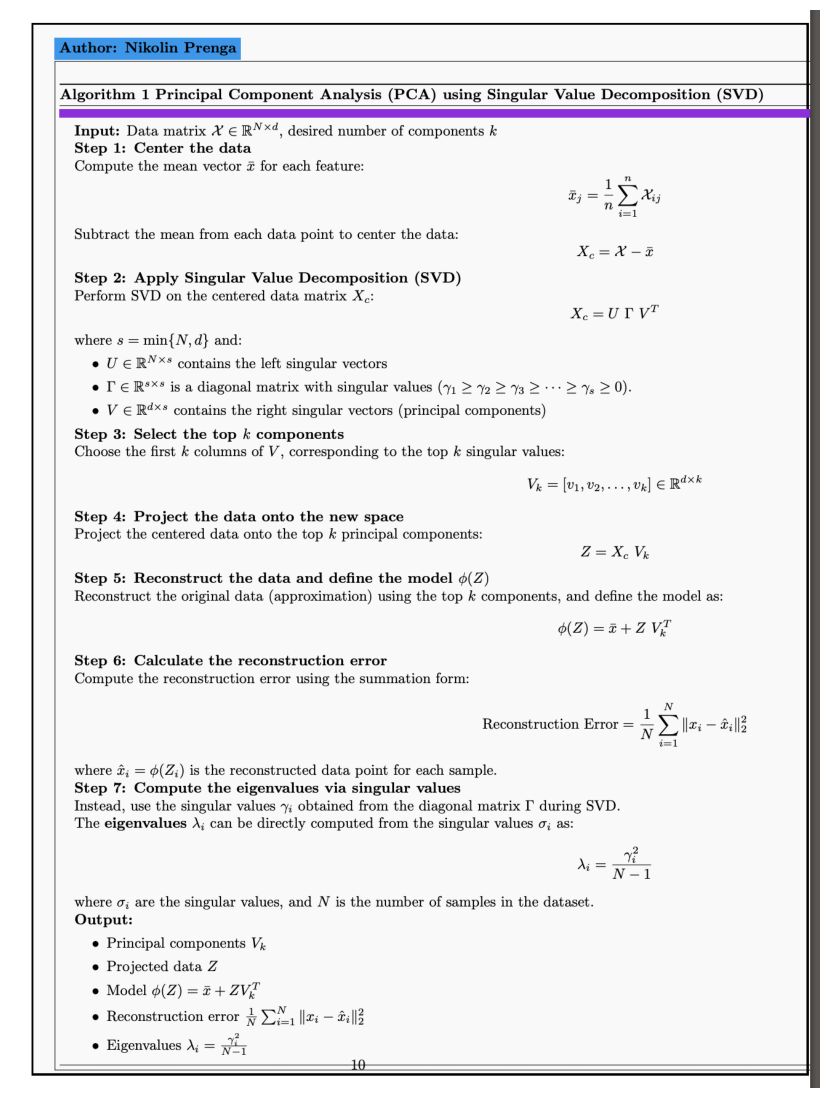

In [11]:

imm= cv2.imread('SVDNikolin.png')

plt.figure(figsize=( 16,14))

plt.imshow(imm)
plt.axis('off')

plt.show()


<span style="color:blue; font-size:25px">Implementing the PCA following closely the pseudoalgorithm for Singular Value Decomposition</span>

In [12]:
class Nikolin_SVD_Decomposition(object):
    def __init__(self, dataset, n_components, target =False,  col_names=False, target_names=False):
        self.dataset =dataset
        self.n_components = n_components
        self.col_names = col_names
        self.target_names = target_names
        self.target = target

    # Step 1 in the algorithm centering the data
    def center_data(self):
        mean = np.mean(self.dataset, axis=0)
        centered_data = self.dataset - mean
        return centered_data, mean

    # Step 2 and 3 combined for applying singular value decomposition and choosing the first k columns of V ,
    # corresponding to the top k singular values:
    def compute_singular_value_decomposition(self):

        centered_data, mean = self.center_data()
        U, Lambda, V_k_transpose = np.linalg.svd(centered_data, full_matrices=False)
        V_k = V_k_transpose.T
        V_k = V_k[:, :self.n_components]

        return U, Lambda, V_k

    # Step 4 Projecting the centered data onto the top k principal components
    def project_centered_data(self):
        _, _, V_k = self.compute_singular_value_decomposition()
        centered_data, _ = self.center_data()

        # Project the centered data onto the top k principal components
        Z = np.dot(centered_data, V_k)
        return Z


    # Implements Step 5 (reconstruction with f(Z) = mean(x) + Z V_k^T)
    # and Step 6 (computation of reconstruction error using summation).
    def reconstruct_and_compute_error(self):

        N = self.dataset.shape[0]
        Z = self.project_centered_data()
        _, mean = self.center_data()
        _, _, V_k = self.compute_singular_value_decomposition()

        #f_z = mean[: , np.newaxis] + np.dot(Z, V_k.T)
        f_z = mean + np.dot(Z, V_k.T)
        reconstruction_error_sum = np.sum(np.square(self.dataset - f_z) )#np.linalg.norm(self.dataset - f_z.T)
        reconstruction_error = (1/N)*reconstruction_error_sum
        #reconstruction_error = np.linalg.norm(self.dataset - f_z)
        #print(f' \nreconstruction_error: {reconstruction_error}\n')
        return f_z, reconstruction_error

    # Step 7: Compute the eigenvalues via singular values
    def compute_eigenvalues_from_singular_values(self):
        _, S, _ = self.compute_singular_value_decomposition()
        N = self.dataset.shape[0]
        eigenvalues = (S**2) / (N - 1)
        return eigenvalues, S

    def compute_variance_ratio_eigenvalues_singular_values(self):
        eigenvalues, singular_values = self.compute_eigenvalues_from_singular_values()
        eigenvalue_top = eigenvalues[: self.n_components]
        variance_ratio = eigenvalue_top / np.sum(eigenvalues)
        #print(variance_ratio)
        eigenvalues = eigenvalues[: self.n_components]
        singular_values = singular_values[: self.n_components]
        cumulated = np.cumsum(variance_ratio)

        return variance_ratio, eigenvalues, singular_values, cumulated

    def output(self):
        f_z, reconstruction_error = self.reconstruct_and_compute_error()
        projected_data = self.project_centered_data()
        principal_components_svd = self.compute_singular_value_decomposition()[2]
        return principal_components_svd, projected_data,  f_z, reconstruction_error


    def get_feature_loadings(self, col_names_direct = False):

        if col_names_direct:
            features = col_names_direct
        # Check if feature names are set in the class instance
        elif self.col_names:
            features = self.col_names
        # If neither is provided, prompt the user to provide feature names
        else:
            print("Please provide feature names either during class instantiation or as an argument to this function.")
            return None


        _, _, V_k = self.compute_singular_value_decomposition()



        columns = [f'PC{i}' for i in range(1, self.n_components)]
        df_loadings = pd.DataFrame( index=features, columns=columns)

        for  index, pc_feature in enumerate(columns):
            df_loadings[pc_feature] = V_k[: , index]

        return df_loadings




<span style="color:navy; font-size:26px">Creating instances of PCA classes for dimensionality reduction on the dataset</span>


In [13]:
# Creating instances of PCA classes for dimensionality reduction on the dataset:


pca_eigen = Nikolin_PCA_eigen_valuesDecomposition(X.values ,12)# y, features ,  target_names)

pca_svd = Nikolin_SVD_Decomposition(dataset=X.values, n_components=12)




<span style="color:navy; font-size:25px">In this example, we select 12 principal components using the scikit-learn library with the Mice Protein Expression dataset.</span>

<span style="color:navy; font-size:25px"> We extract eigenvalues, transform the data into the principal component space, obtain the explained variance ratio,singular values, and the principal components. </span>


In [14]:
pca_sklear = PCA(n_components=12)
pca_sklear.fit(X)


projected_data_sklearn = pca_sklear.transform(X)

eigenvalues_sklearn = pca_sklear.explained_variance_
explained_variance_ratio_sklearn = pca_sklear.explained_variance_ratio_
singular_values_sklearn = pca_sklear.singular_values_
principal_sklearn = pca_sklear.components_.T





<span style="color:black; font-size:25px">
    Using my own implementation of PCA with eigenvalue decomposition and singular value decomposition (SVD), we extract the following elements from each:
    <ul>
        <li>Projected data in the principal component space for both eigenvalue decomposition and SVD <br></li>
        <li>Eigenvalues from both SVD and eigenvalue decomposition, representing variance captured by each component</li>
        <li>Explained variance ratios, indicating the proportion of variance captured by each component for both methods</li>
        <li>Principal components (the basis vectors) from SVD and eigenvalue decomposition</li>
    </ul>
</span>



In [15]:
# Using my own implementation of PCA with eigenvalue decomposition and singular value decomposition (SVD),
# we extract the following elements from each:

# Projected data in the principal component space for both eigenvalue decomposition and SVD
projected_data_eigen = pca_eigen.output()[0]
projected_data_svd = pca_svd.output()[1]

# Eigenvalues from both SVD and eigenvalue decomposition, representing variance captured by each component
eigenvalues_svd = pca_svd.compute_variance_ratio_eigenvalues_singular_values()[1]
eigenvalues_eigen = pca_eigen.output()[2]

# Explained variance ratios, indicating the proportion of variance captured by each component for both methods
explained_variance_eigen = pca_eigen.explained_variance_ratio()[0]
explained_variance_svd = pca_svd.compute_variance_ratio_eigenvalues_singular_values()[0]

# Principal components (the basis vectors) from SVD and eigenvalue decomposition
principal_components_svd = pca_svd.output()[0]
principal_components_eigen = pca_eigen.output()[1]




<span style="color:navy; font-size:26px">This function generates scatter plots of the PCA-projected data in both 2D and 3D.It takes the PCA-transformed scores, the target labels for each data point, and the target names as input. The function creates separate scatter plots for the first three principal components in 3D and the first two principal components in 2D, coloring points based on their target class.</span>


In [16]:
# This function generates scatter plots of the PCA-projected data in both 2D and 3D.
# It takes the PCA-transformed scores, the target labels for each data point, and the target names as input.
# The function creates separate scatter plots for the first three principal components in 3D and
# the first two principal components in 2D, coloring points based on their target class.


def pca_2d_3d_scatterplot(scores, target, target_names, implementation_type):

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'magenta']

    if scores.shape[1] <2:
        print("Error: At least two principal components are required for plotting.")
        print("Please include more components in your projected data.")
        return

    if scores.shape[1] >2:
        print('3D scatter plot of the projected data points')
        scores_3d = scores[:, :3]
        fig = plt.figure(figsize = (20,10)  )
        ax = fig.add_subplot(111, projection='3d')

        for target_val, color, target_name in zip(np.unique(target), colors, target_names):
            ax.scatter(scores_3d[target == target_val, 0], scores_3d[target == target_val, 1],
            scores_3d[target == target_val, 2], label=target_name, c=color, s=60)
            #print(target_val)
            #print(target_val)
            #print('______________')

        # Set title and labels with fontsize
        ax.set_title(f"Top 3 PCA Dimensions - {implementation_type} Implementation", fontsize=15)

        ax.set_xlabel("Principal Component 1", fontsize=15)
        ax.set_ylabel("Principal Component 2", fontsize=15)
        ax.set_zlabel("Principal Component 3", fontsize=15)
        ax.tick_params(axis='both', labelsize=9)
        #ax.legend()
        #ax.view_init(elev=200, azim=440)  # Change elev and azim to adjust the angle
        #ax.view_init(elev=210, azim=450, roll=0)
        ax.legend(loc='best', fontsize=15)
        plt.show()

    if scores.shape[1] >=2:
        print('2D scatter plot of the projected data points')

        scores_2d = scores[:, :2]

        plt.figure(figsize=(10, 8))

        for target_val, col, target_name in zip(np.unique(target), colors, target_names):
            plt.scatter(scores_2d[target == target_val, 0],
                    scores_2d[target == target_val, 1], c=col, label=target_name)

        plt.title(f"First two PCA dimensions   - {implementation_type} Implementation", c='darkblue', fontsize=17)
        plt.xlabel("Principal Component 1", c='black', fontsize=15)
        plt.ylabel("Principal Component 2", c='black', fontsize=15)
        plt.legend()
        plt.show()








3D scatter plot of the projected data points


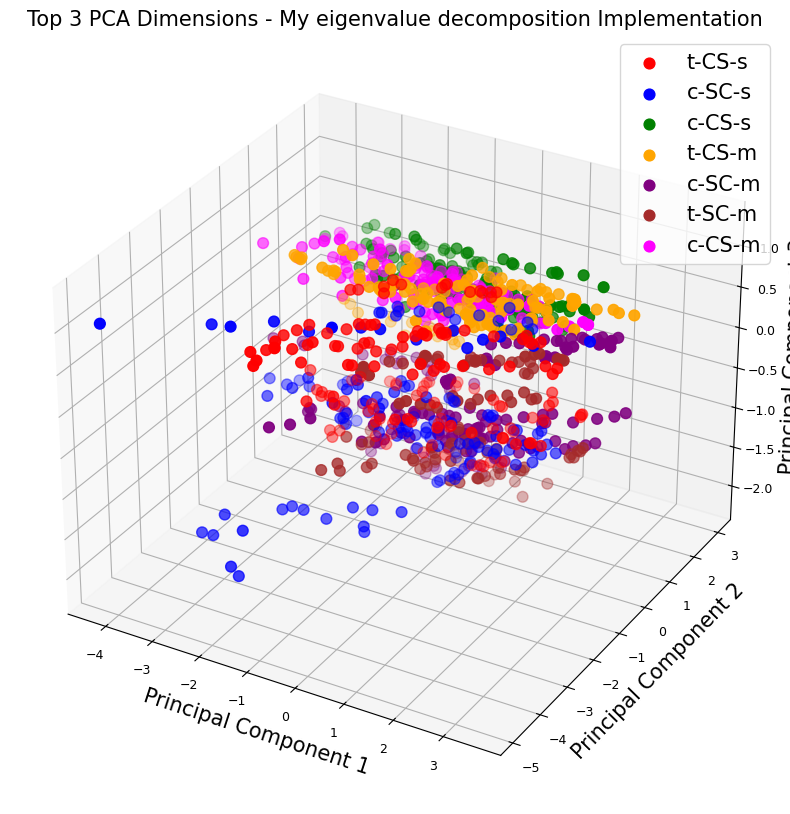

2D scatter plot of the projected data points


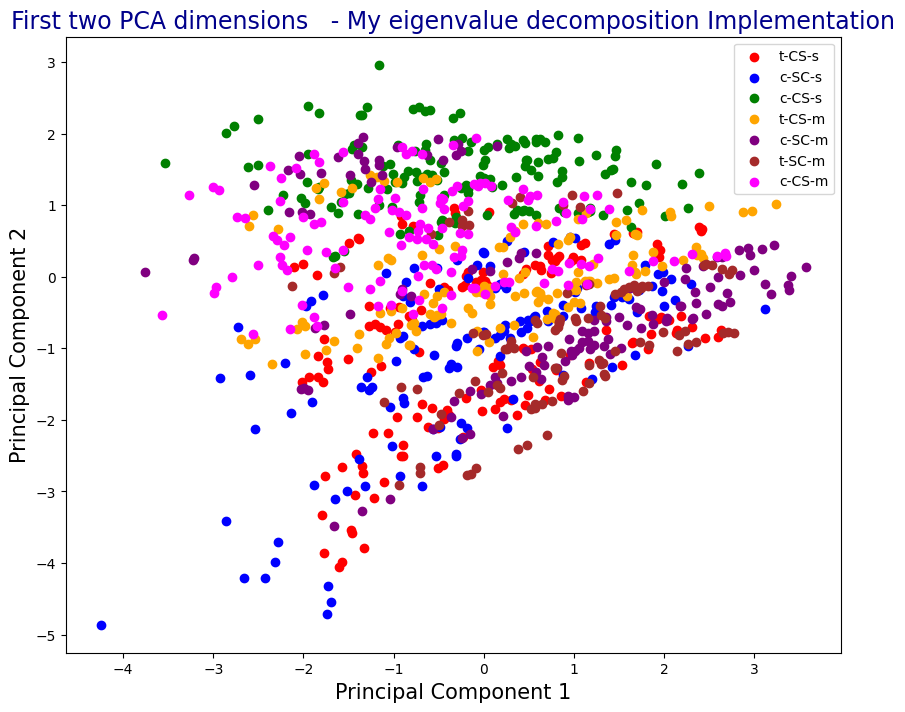

In [17]:
pca_2d_3d_scatterplot(projected_data_eigen, y, target_names, 'My eigenvalue decomposition')



3D scatter plot of the projected data points


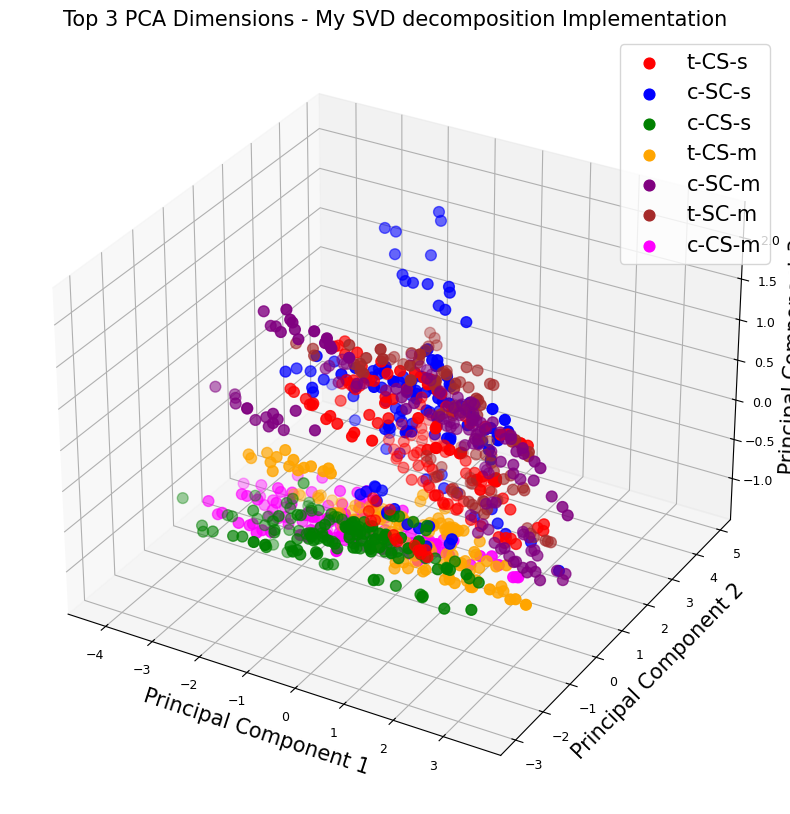

2D scatter plot of the projected data points


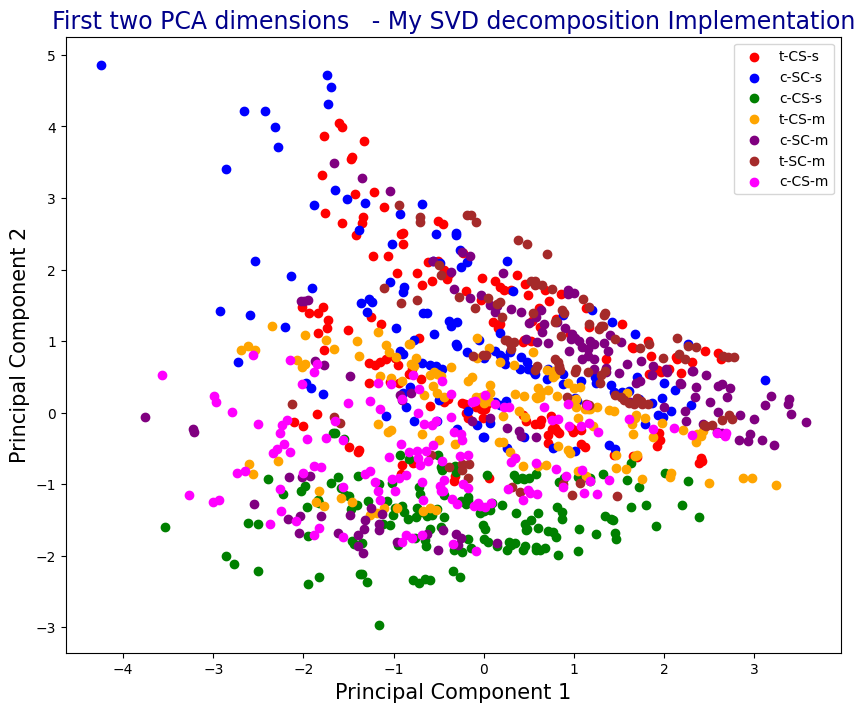

In [18]:
pca_2d_3d_scatterplot(projected_data_svd, y, target_names, 'My SVD decomposition')


3D scatter plot of the projected data points


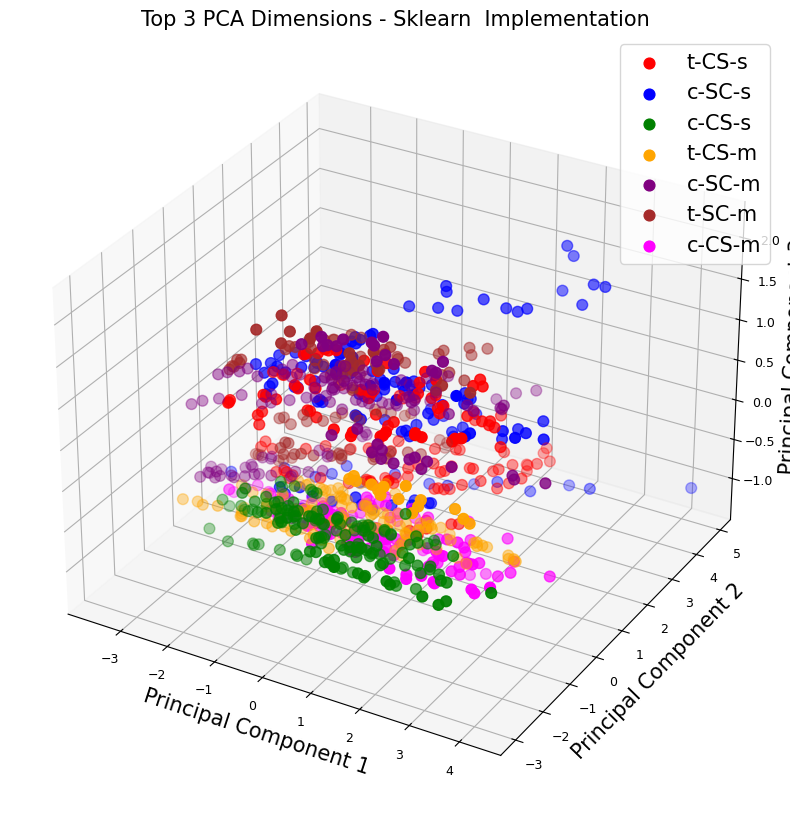

2D scatter plot of the projected data points


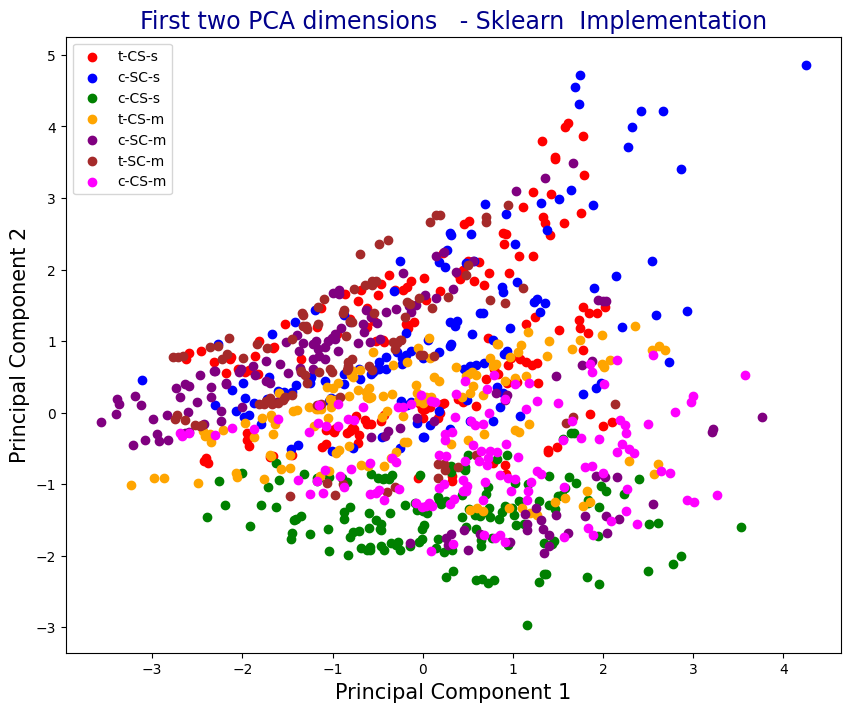

In [19]:
pca_2d_3d_scatterplot(projected_data_sklearn, y, target_names, 'Sklearn ')



<span style="color:black; font-size:25px"> 
    This function generates a scree plot to visualize the eigenvalues of each principal component. <br>
    The eigenvalues indicate the amount of variance each principal component explains. <br>
    It takes as input: 
    <ul>
        <li>eigenvalues: a list or array of eigenvalues sorted in descending order </li>
        <li>implementation_type: a label indicating which PCA method was used (e.g., "Eigenvalue Decomposition", "SVD", or "Sklearn") </li>
    </ul>
</span>

In [20]:

# This function generates a scree plot to visualize the eigenvalues of each principal component.
# The eigenvalues indicate the amount of variance each principal component explains.
# It takes as input:
# - eigenvalues: a list or array of eigenvalues sorted in descending order
# - implementation_type: a label indicating which PCA method was used (e.g., "Eigenvalue Decomposition", "SVD", or "Sklearn")

def pca_sceeplot(eigenvales, implementation_type):

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvales) + 1), eigenvales, '--', lw=3, color ='green')
    plt.scatter(range(1, len(eigenvales) + 1), eigenvales,   color ='black', s= 200)


    plt.title(f"PCA Eigenvalues for - {implementation_type} Implementation", c='blue', fontsize=17)
    plt.xlabel('Principal Component', c='magenta', fontsize=15)
    plt.ylabel('Eigenvalue', c='magenta', fontsize=15)
    plt.grid(True)
    plt.show()



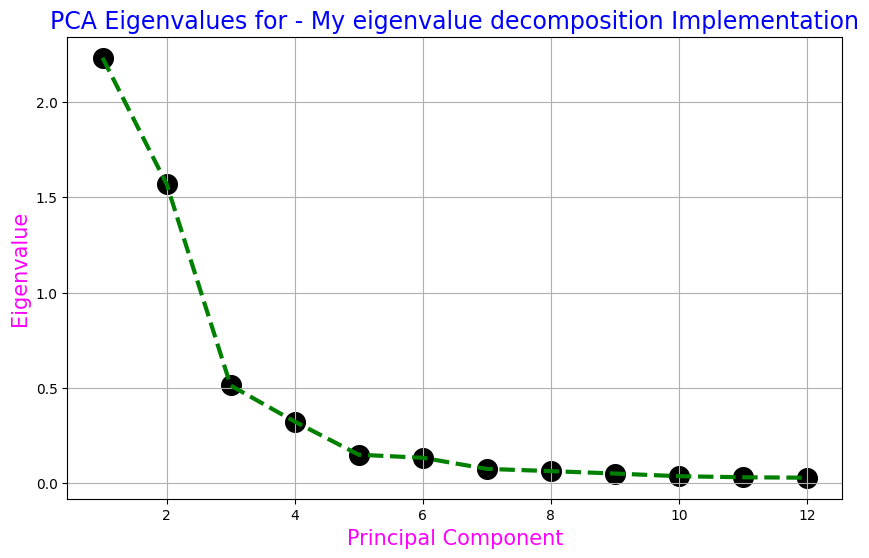

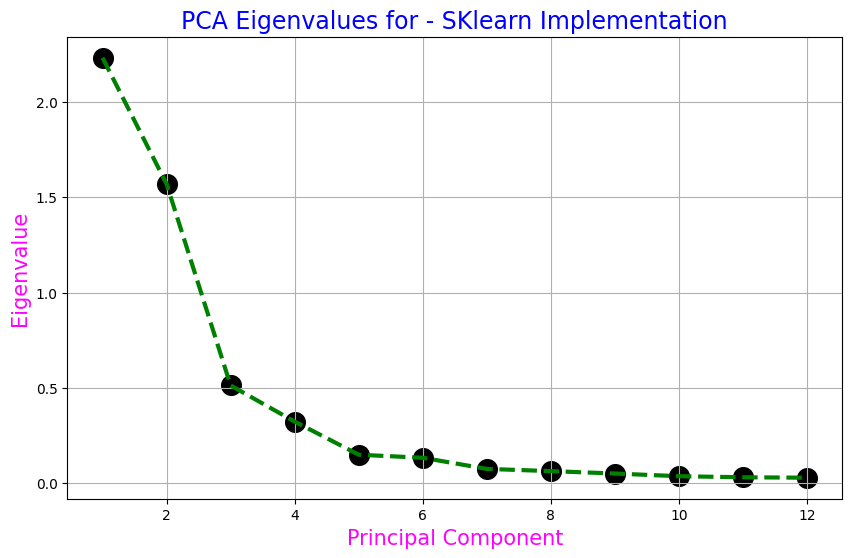

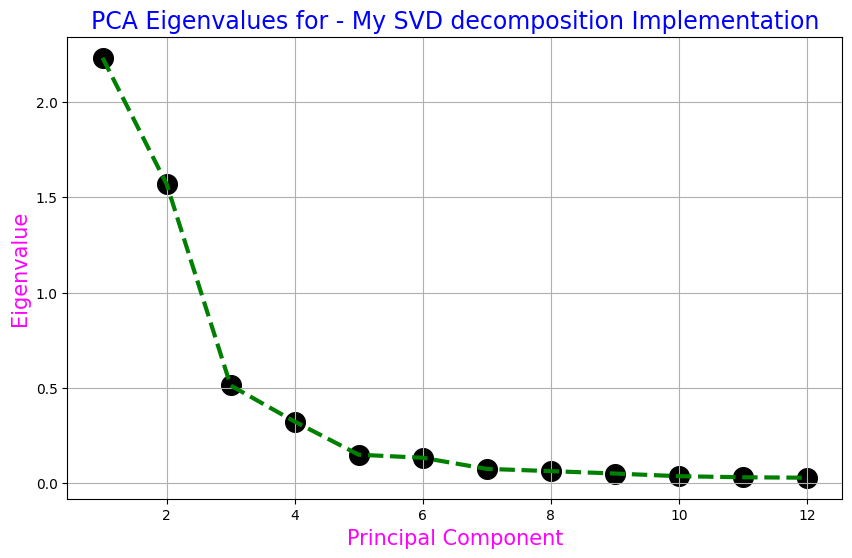

In [21]:
pca_sceeplot(eigenvalues_eigen, 'My eigenvalue decomposition')

print('\n')

pca_sceeplot(eigenvalues_sklearn, 'SKlearn')

print('\n')
pca_sceeplot(eigenvalues_svd, 'My SVD decomposition')




In [22]:

# This function visualizes the explained variance ratio of each principal component
# and the cumulative variance explained by successive components in a PCA.

# It creates two plots:
# 1. A bar plot showing the explained variance of each principal component as bars,
#    with a line plot overlay that highlights each variance value with dots.
#    The exact percentage of explained variance is displayed on top of each bar.
# 2. A line plot of cumulative explained variance across components,
#    showing the cumulative variance percentage that each successive component adds.
#    A horizontal dashed line at the specified cutoff (default 90%) indicates
#    the target threshold, helping to visually determine the number of components needed.

# Input:
# - explained_variance_ratio: Array of explained variance ratios per component.
# - implementation_type: String indicating the PCA implementation type (e.g., "Eigenvalue", "SVD", "Sklearn").
# - cutoff: The cumulative variance percentage threshold to display on the plot (default is 90%).

# The function first scales the explained variance ratio to percentages.
# Then, it computes the cumulative explained variance for each component to facilitate cumulative plotting.




def plot_pca_variance(explained_variance_ratio, implementation_type,  cutoff=90):
    explained_variance_ratio=explained_variance_ratio*100
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    x_plot = range(1, len(explained_variance_ratio) + 1)
    y_plot = explained_variance_ratio


    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i+1, y[i]+0.2,f'{np.round(y[i],1)} %')



    # Create a bar plot of the explained variance ratio
    plt.figure(figsize=(14, 7))

    plt.bar(x_plot, y_plot, color = 'midnightblue')
    plt.plot(x_plot, y_plot, 'o-', lw= 3)
    addlabels(x_plot, y_plot)
    plt.title(f'Explained Variance by Principal Components - {implementation_type} Implementation', color='navy', fontsize=15)
    plt.xlabel('Principal Component Index', c='magenta', fontsize=18)
    plt.ylabel('Explained Variance (%)', c='magenta', fontsize=18)
    #plt.ylim(0, max(explained_variance_ratio)+0.05)
    plt.xticks(x_plot, fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True)
    plt.legend(['Explained Variance Ratio'])
    plt.show()

    print('Cumulative Explained Variance Ratio \n \n \n')

    plt.figure(figsize=(14, 7))

    plt.plot(x_plot, cumulative_explained_variance_ratio, 'o-', lw= 3)
    plt.axhline(y=cutoff, color='green', linestyle='--', lw=2)
    plt.text(1, cutoff+3, f'{cutoff} % variance threshold', color='green', fontsize=18)
    #plt.title('Cumulative Explained Variance Ratio', c='navy', fontsize=18)
    plt.title(f'Cumulative Variance Explained by Principal Components - {implementation_type} Implementation', color='navy', fontsize=15)
    plt.xlabel('Number of Principal Components', c='magenta', fontsize=18)
    plt.ylabel('Cumulative Variance Explained (%)', c='magenta', fontsize=18 )
    plt.xticks(x_plot, fontsize=18)
    plt.ylim(30, max(cumulative_explained_variance_ratio)+3 )
    plt.yticks(fontsize=18)
    plt.grid(True)
    plt.show()




#plot_pca_variance(explained_variance_ratio, cutoff=90)

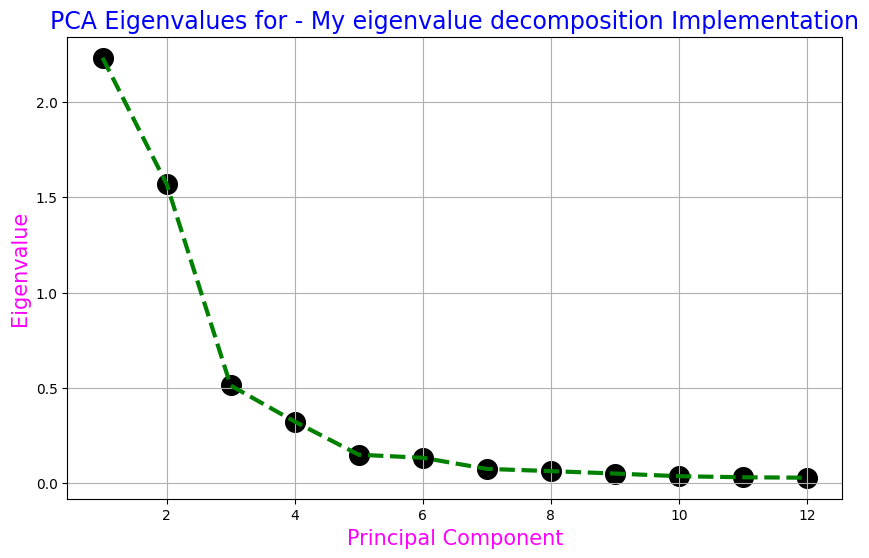

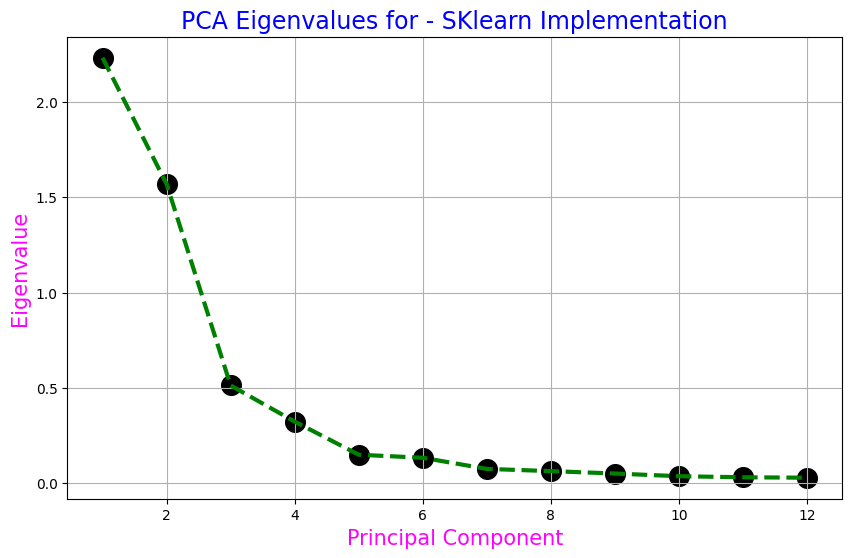

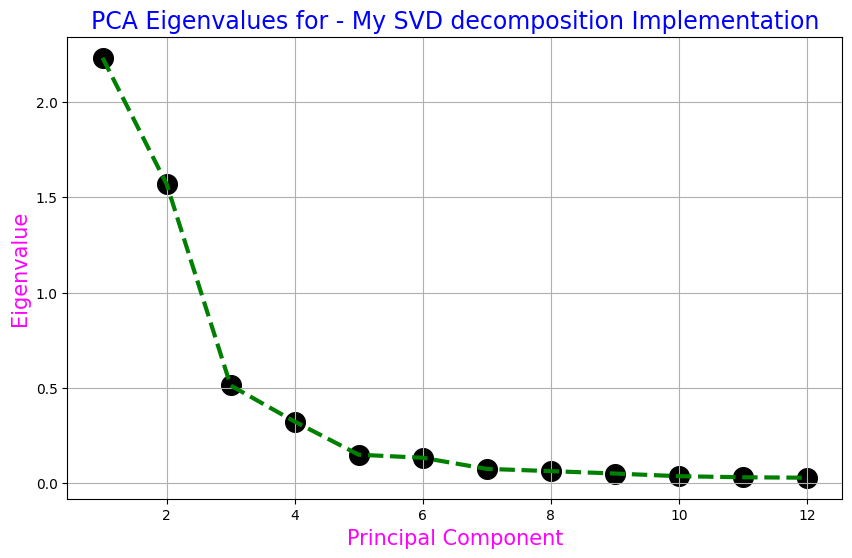

In [23]:
pca_sceeplot(eigenvalues_eigen, 'My eigenvalue decomposition')

print('\n')

pca_sceeplot(eigenvalues_sklearn, 'SKlearn')

print('\n')
pca_sceeplot(eigenvalues_svd, 'My SVD decomposition')

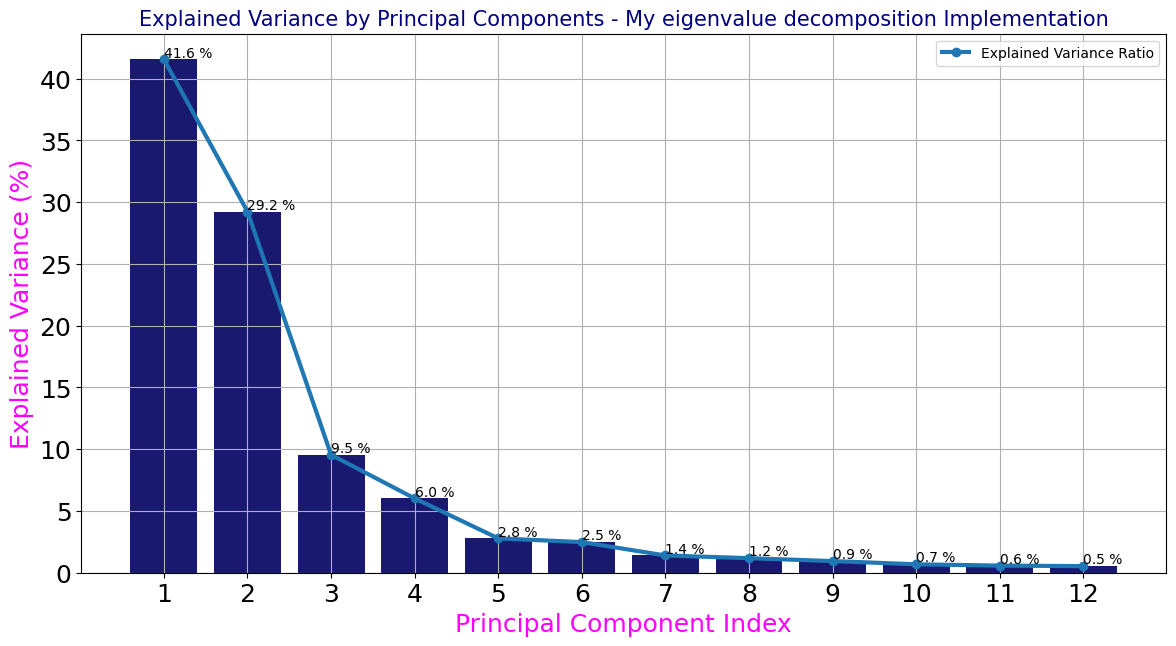

Cumulative Explained Variance Ratio 
 
 



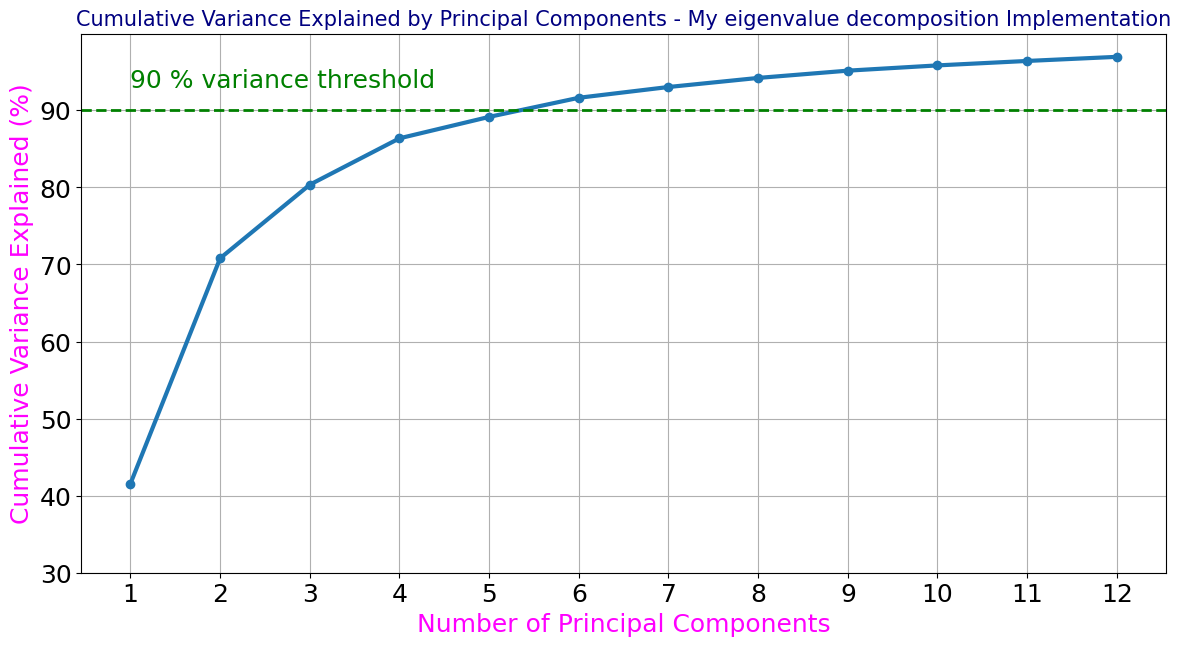

In [24]:
plot_pca_variance(explained_variance_eigen, 'My eigenvalue decomposition')

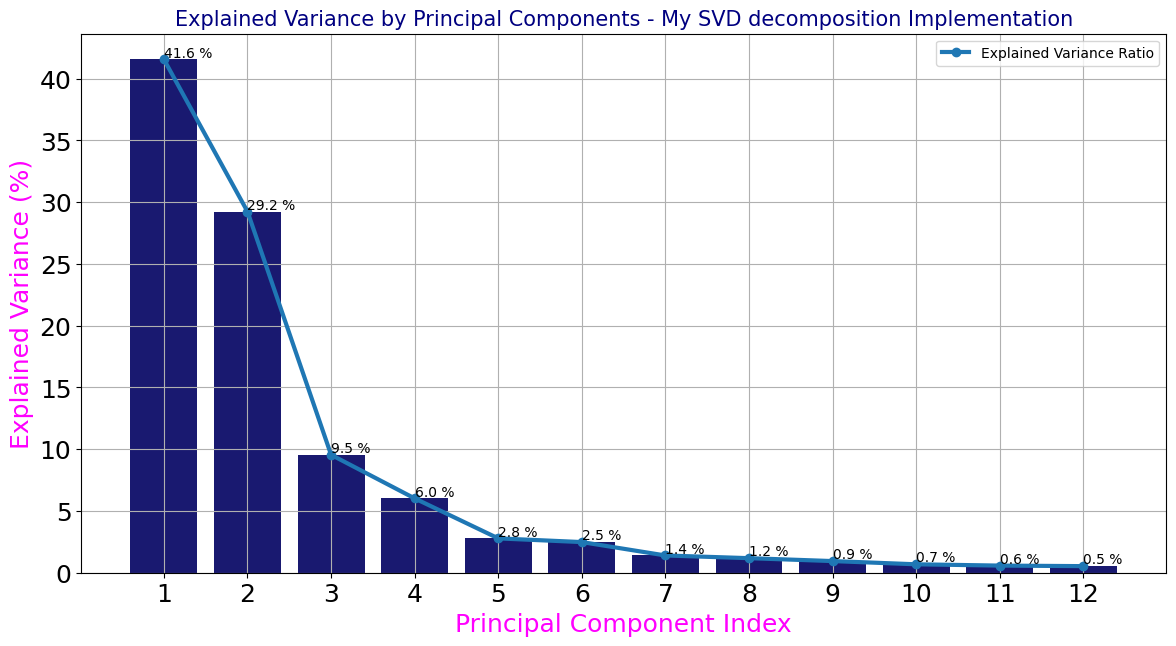

Cumulative Explained Variance Ratio 
 
 



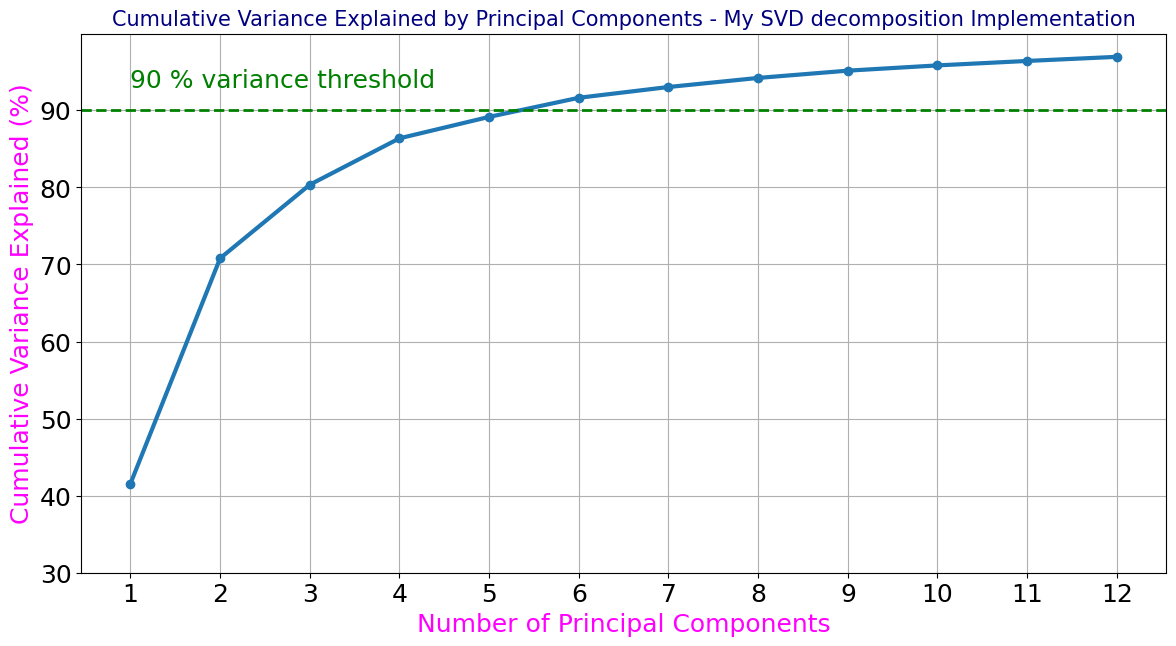

In [25]:
plot_pca_variance(explained_variance_svd, 'My SVD decomposition')

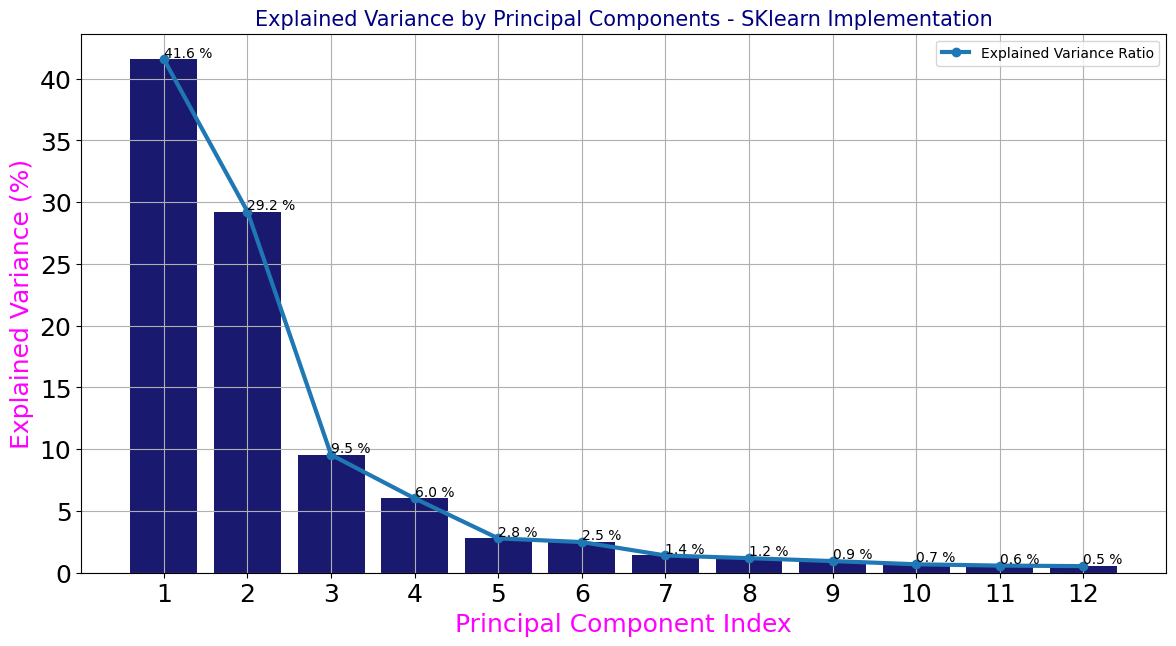

Cumulative Explained Variance Ratio 
 
 



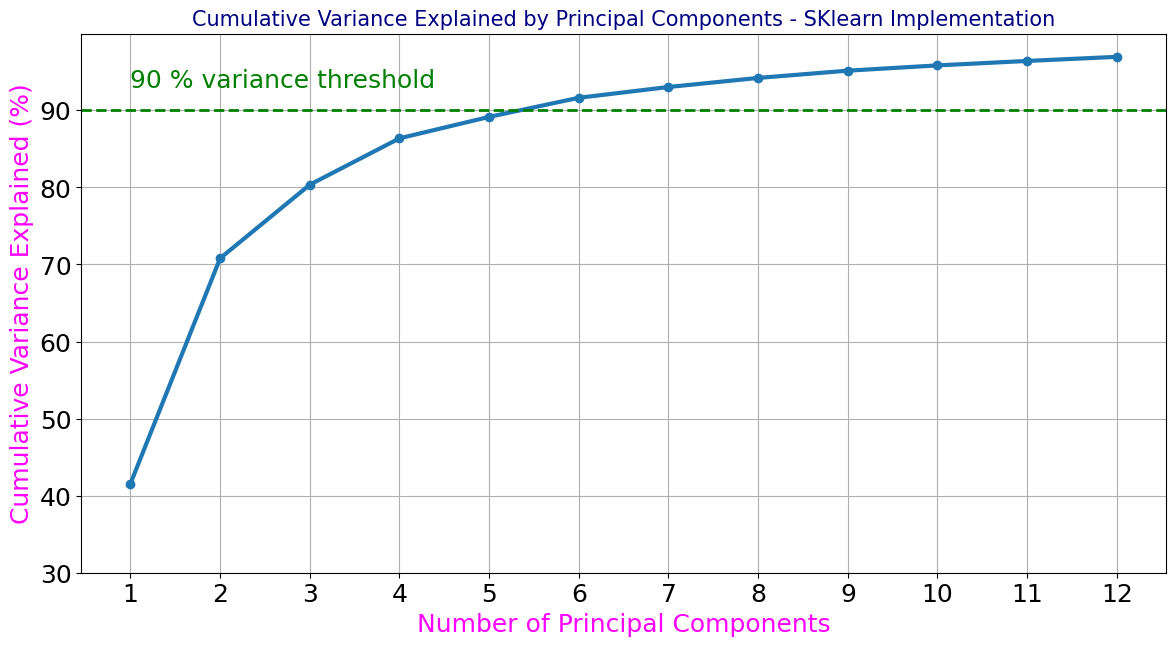

In [26]:
plot_pca_variance(explained_variance_ratio_sklearn, 'SKlearn')

<span style="background-color:yellow; color:blue; font-size:20px">This function generates a 2D or 3D PCA biplot to visualize the principal component scores and loadings. <br> It takes as input the PCA scores (projected data in PC1, PC2, and optionally PC3), loadings (principal component directions),target names, feature names, the target labels, and the implementation type (label for the plot). <br> The function produces a 3D scatter plot of the scores with loadings as vectors if three PCs are present. <br> A biplot displays both the observations (scores) and variables (loadings) on the same plot to interpret relationships.</span>




In [27]:
# This function generates a 2D or 3D PCA biplot to visualize the principal component scores and loadings.
# It takes as input the PCA scores (projected data in PC1, PC2, and optionally PC3), loadings (principal component directions),
# target names, feature names, the target labels, and the implementation type (label for the plot).
# The function produces a 3D scatter plot of the scores with loadings as vectors if three PCs are present.
# A biplot displays both the observations (scores) and variables (loadings) on the same plot to interpret relationships.



def plot_pca_biplot(scores, loadings, feature_names, target_names , target, implementation_type):

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'magenta']#



    if loadings.shape[1] >= 3:
        # Create a 3D scatter plot
        scatter_data = []

        # Create a scatter plot for each class (target_value)
        for target_value, colore, target_name in zip(np.unique(target), colors, target_names):
            scatter_data.append(go.Scatter3d(
                x=scores[target == target_value, 0],  # X axis (first principal component)
                y=scores[target == target_value, 1],  # Y axis (second principal component)
                z=scores[target == target_value, 2],  # Z axis (third principal component)
                mode='markers',
                marker=dict(size=6, color=colore, opacity=0.8),  # Marker properties
                name=target_name  # Label for the legend
            ))

        # Create the 3D figure
        fig = go.Figure(data=scatter_data)

        # Create the quiver plot for the loadings (vectors)
        loading_vectors = []
        scaling_factor = 6  # Scale the vectors to make them longer
        arrow_size = 0.02

        x_vals, y_vals, z_vals = [], [], []
        u_vals, v_vals, w_vals = [], [], []

        for i in range(loadings.shape[0]):
            # Plot the vector as a longer line
            loading_vectors.append(go.Scatter3d(
                x=[0, loadings[i, 0] * scaling_factor],
                y=[0, loadings[i, 1] * scaling_factor],
                z=[0, loadings[i, 2] * scaling_factor],
                mode='lines+text',
                text=[None, feature_names[i]],
                textposition='top center',
                textfont=dict(size=13, color='black'),
                line=dict(width=9, color='black'),
                name=feature_names[i]
              ))



            # Store the start point and direction for each vector (cone shape)
            x_vals.append(loadings[i, 0] * scaling_factor)
            y_vals.append(loadings[i, 1] * scaling_factor)
            z_vals.append(loadings[i, 2] * scaling_factor)
            u_vals.append(loadings[i, 0] * arrow_size)
            v_vals.append(loadings[i, 1] * arrow_size)
            w_vals.append(loadings[i, 2] * arrow_size)


        loading_vectors.append(go.Cone(
        x=x_vals, y=y_vals, z=z_vals,  # Starting points of the arrows
        u=u_vals, v=v_vals, w=w_vals,  # Directions and sizes of the arrows
        sizemode='absolute',
        sizeref=0.04,  # Adjust arrowhead size
        anchor="tip",  # Ensure the arrowhead is placed at the tip
        showscale=False,  # No color scale for the arrows
        colorscale=[[0, 'gray'], [1, 'gray']],
        ))

        # Add the loading vectors to the figure
        fig.add_traces(loading_vectors)

        # Compute axis range based on max(abs(scores)) for proper scaling
        axis_range = max(abs(scores.flatten())) * 0.8  # Add some padding

        # Update the layout with axis ranges based on max(abs(Z))


        fig.update_layout(
            scene=dict(
            xaxis_title=dict(text="Principal Component 1", font=dict(size=18, color="black")),
            yaxis_title=dict(text="Principal Component 2", font=dict(size=18, color="black")),
            zaxis_title=dict(text="Principal Component 3", font=dict(size=18, color="black")),
            #xaxis=dict(range=[-axis_range, axis_range]),
            #yaxis=dict(range=[-axis_range, axis_range]),
            #zaxis=dict(range=[-axis_range, axis_range])
            ),
          width=1500,  # Set the width of the plot

          height=1000,  # Set the height of the plot

          margin=dict(r=20, l=10, b=10, t=10),  # Set margins

          title=dict(
              text=f"3D PCA Plot Biplot - {implementation_type} Implementation",  # Title text
                font=dict(size=24, color="navy"),  # Font size and color
                x=0.5,  # Position title in the middle (0 = left, 1 = right)
                y=0.95,  # Position title closer to the plot (1 = top, decrease to move down)
                xanchor='center',  # Anchor title at the center
                yanchor='top'  # Align title to the top
              ),

          legend=dict(
              font=dict(size=10, color="black"),
              x=0.6,  # Position closer to the right side (adjust as needed)
              y=0.7,  # Position it lower or higher based on the plot (1 is top, 0 is bottom)
              xanchor='center',  # Horizontal anchor of the legend
              yanchor='top'  # Vertical anchor of the legend
          )
          )

        fig.show()

    else:
        print('There are not 3 Principal Components!')


    print('Biplot in 2d \n \n ')
    plt.figure(figsize=(20, 10))
    scaling_factor = np.max(np.abs(scores))* 1.4


    for target_value , colore, target_name in zip(np.unique(target), colors, target_names):
        plt.scatter(scores[target == target_value, 0], scores[target == target_value, 1], label=target_name, c=colore)

    for i in range(loadings.shape[0]):

        plt.arrow(0, 0, loadings[i, 0] * scaling_factor, loadings[i, 1] * scaling_factor, color='navy', width=0.009, head_width=0.1)
        plt.text(loadings[i, 0] * scaling_factor , loadings[i, 1] * scaling_factor +0.3,
                 feature_names[i], color='black', ha='center', va='center', fontsize=8)

    plt.xlabel('Principal Component 1', fontsize=16)
    plt.ylabel('Principal Component 2', fontsize=16)
    plt.title(f'2D PCA Biplot - {implementation_type} Implementation', fontsize = 20, color ='darkgreen')
    plt.grid()
    plt.axhline(0, color='grey', lw=2)
    plt.axvline(0, color='grey', lw=2)
    plt.legend()
    plt.show()

#plot_pca_biplot(scores, U_k, features, Target_names, y)

In [28]:
#!pip install -U kaleido

#!pip install -U kale

In [29]:

def plot_pca_biplot_gif(scores, loadings, feature_names, target_names, target, implementation_type):
    colors = ['red', 'blue', 'cyan', 'orange', 'purple', 'brown', 'magenta']
    frames = []
    angles = np.linspace(0, 360, 72)  # Adjust for smoother rotation

    # Create a directory for images if it doesn't exist
    image_dir = '/content/plot_images'
    os.makedirs(image_dir, exist_ok=True)

    if loadings.shape[1] >= 3:
        # Create a 3D scatter plot
        scatter_data = []
        for target_value, colore, target_name in zip(np.unique(target), colors, target_names):
            scatter_data.append(go.Scatter3d(
                x=scores[target == target_value, 0],
                y=scores[target == target_value, 1],
                z=scores[target == target_value, 2],
                mode='markers',
                marker=dict(size=6, color=colore, opacity=0.8),
                name=target_name
            ))

        # Create the 3D figure
        fig = go.Figure(data=scatter_data)

        # Create loading vectors as 3D lines
        loading_vectors = []
        scaling_factor = 6
        arrow_size = 0.02
        x_vals, y_vals, z_vals = [], [], []
        u_vals, v_vals, w_vals = [], [], []

        for i in range(loadings.shape[0]):
            loading_vectors.append(go.Scatter3d(
                x=[0, loadings[i, 0] * scaling_factor],
                y=[0, loadings[i, 1] * scaling_factor],
                z=[0, loadings[i, 2] * scaling_factor],
                mode='lines+text',
                text=[None, feature_names[i]],
                textposition='top center',
                textfont=dict(size=13, color='black'),
                line=dict(width=9, color='black'),
                name=feature_names[i]
            ))
            x_vals.append(loadings[i, 0] * scaling_factor)
            y_vals.append(loadings[i, 1] * scaling_factor)
            z_vals.append(loadings[i, 2] * scaling_factor)
            u_vals.append(loadings[i, 0] * arrow_size)
            v_vals.append(loadings[i, 1] * arrow_size)
            w_vals.append(loadings[i, 2] * arrow_size)

        loading_vectors.append(go.Cone(
            x=x_vals, y=y_vals, z=z_vals,
            u=u_vals, v=v_vals, w=w_vals,
            sizemode='absolute',
            sizeref=0.04,
            anchor="tip",
            showscale=False,
            colorscale=[[0, 'gray'], [1, 'gray']]
        ))
        fig.add_traces(loading_vectors)

        # Set layout options
        fig.update_layout(
            scene=dict(
                xaxis_title="Principal Component 1",
                yaxis_title="Principal Component 2",
                zaxis_title="Principal Component 3"
            ),
            width=1500,
            height=1000,
            title=f"3D PCA Plot Biplot - {implementation_type} Implementation"
        )

        # Rotate and save each frame
        for angle in angles:
            #fig.update_layout(scene_camera=dict(eye=dict(x=1.25 * np.sin(np.radians(angle)),
                                                         #y=1.25 * np.cos(np.radians(angle)),
                                                         #z=0.5)))

            fig.update_layout(scene_camera=dict(
                eye=dict(
                    x=1.25 * np.sin(np.radians(angle)),
                    y=1.25 * np.cos(np.radians(angle)),
                    z=0.5 * np.sin(np.radians(angle * 2))
                )
            ))

            # Save frame as an image
            file_path = f"{image_dir}/plot_{int(angle)}.png"
            fig.write_image(file_path)
            frames.append(imageio.imread(file_path))

        # Create GIF
        output_path = "/content/3d_pca_biplot_rotation.gif"
        imageio.mimsave(output_path, frames, duration=0.7)

        # Clean up temporary images
        for file_path in os.listdir(image_dir):
            os.remove(os.path.join(image_dir, file_path))
        os.rmdir(image_dir)  # Remove the directory

        return output_path

    else:
        print('There are not 3 Principal Components!')





In [30]:
#plot_pca_biplot_gif(projected_data_eigen, principal_components_eigen, features, target_names, y, 'My eigenvalue decomposition')


In [31]:
#plot_pca_biplot_gif(projected_data_svd, principal_components_svd, features, target_names, y, 'My SVD decomposition')


In [32]:
#plot_pca_biplot_gif(projected_data_sklearn, principal_sklearn, features, target_names, y, 'My eigenvalue decomposition')


Biplot in 2d 
 
 


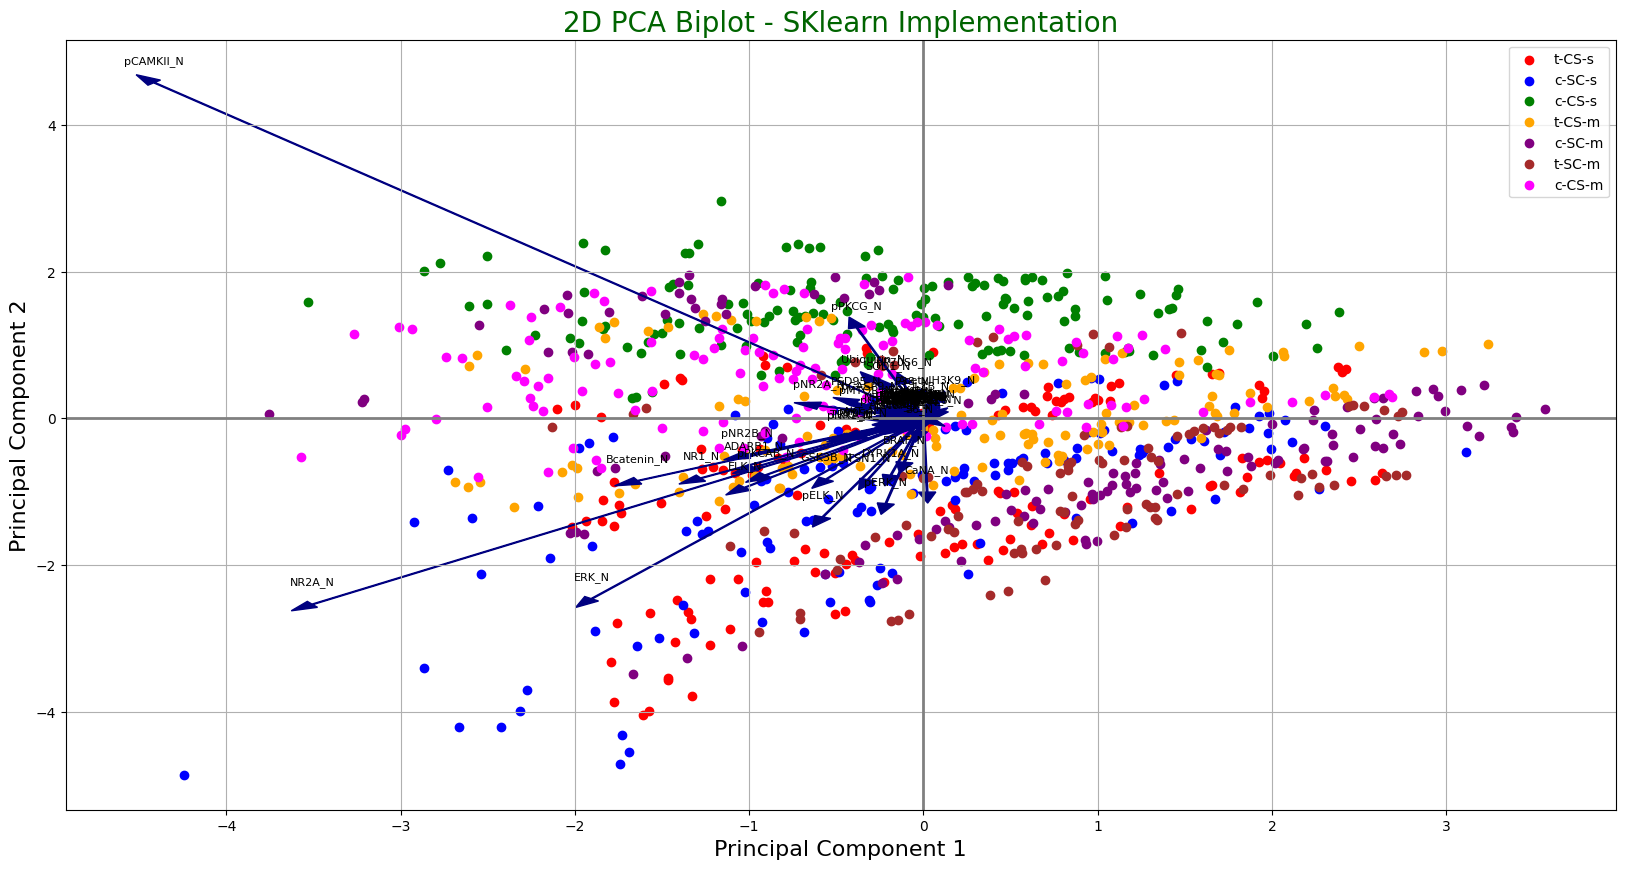

In [33]:
plot_pca_biplot(projected_data_eigen, principal_components_eigen, features, target_names, y, 'SKlearn')

In [34]:
# Loadings per each principal component as a dataframe

df_loadings =pca_eigen.get_feature_loadings(features)
D_sorted =df_loadings.sort_values(by='PC1', key=lambda x: x.abs(), ascending=False)

D_sorted.head(20)


PC1       PC2       PC3       PC4       PC5       PC6  \
pCAMKII_N  -0.648251  0.672909 -0.018338  0.235858  0.025050  0.172766   
NR2A_N     -0.514948 -0.372802  0.173878 -0.104135  0.333609 -0.094893   
ERK_N      -0.279657 -0.361600  0.018171 -0.179989 -0.142769  0.162561   
Bcatenin_N -0.240737 -0.125083  0.038948 -0.094544 -0.252698 -0.250569   
NR1_N      -0.187539 -0.119825  0.017784 -0.061818 -0.098649 -0.166185   
ELK_N      -0.150512 -0.138676  0.013879 -0.099513 -0.202575 -0.079756   
pNR2B_N    -0.148689 -0.073452  0.087174 -0.033347 -0.063445 -0.032673   
ADARB1_N   -0.142919 -0.098356 -0.016703 -0.190450  0.246154  0.179128   
pPKCAB_N   -0.133245 -0.113969 -0.518901 -0.128638  0.280480  0.078147   
pNR2A_N    -0.087955  0.025318  0.093160 -0.038795 -0.061821  0.028130   
pELK_N     -0.084857 -0.197665 -0.089282  0.565547 -0.127661 -0.249202   
GSK3B_N    -0.081889 -0.122040 -0.147284  0.100884 -0.031895 -0.017086   
pNR1_N     -0.062575 -0.036318  0.032459 -0.021862 -0.016488 -0.058009   
TRKA_N     -0.060712 -0.036153 -0.030759 -0.030176 -0.059297 -0.021085   
PSD95_N    -0.057042  0.031237  0.072327 -0.091514 -0.405017  0.175688   
pPKCG_N    -0.056183  0.181856 -0.651906 -0.310995 -0.181169 -0.320879   
AKT_N      -0.052846 -0.029705  0.067524 -0.012384 -0.054252 -0.083145   
P70S6_N    -0.050453 -0.033645  0.053539 -0.032903 -0.225274  0.178413   
pMTOR_N    -0.048339  0.012738  0.073588  0.011769  0.028825 -0.052545   
ITSN1_N    -0.046813 -0.122834 -0.134844  0.230362 -0.139153  0.015568   

                 PC7       PC8       PC9      PC10      PC11  
pCAMKII_N  -0.080445 -0.113933  0.021822 -0.076020 -0.039889  
NR2A_N     -0.239816  0.383167 -0.270503  0.170292  0.249806  
ERK_N      -0.094626 -0.529689  0.195851 -0.306615  0.223185  
Bcatenin_N -0.182644  0.040732  0.047402 -0.005784 -0.265399  
NR1_N       0.037364  0.134087  0.270631 -0.036398 -0.246231  
ELK_N       0.036232 -0.356572 -0.050584  0.238397 -0.093981  
pNR2B_N     0.115784  0.081748  0.177035  0.109906 -0.068511  
ADARB1_N    0.607094 -0.021353 -0.442402 -0.327908 -0.164944  
pPKCAB_N    0.200968 -0.009876  0.292607  0.198765 -0.254622  
pNR2A_N     0.184315 -0.035301  0.019924  0.206831 -0.005840  
pELK_N      0.367512 -0.001579  0.103717 -0.050877  0.455316  
GSK3B_N    -0.038729  0.109002  0.034329 -0.118206 -0.132468  
pNR1_N      0.017477  0.018169  0.066234  0.051221 -0.075883  
TRKA_N      0.032136  0.056301  0.080551 -0.124447 -0.030795  
PSD95_N     0.081078  0.458937 -0.019777 -0.245330  0.034164  
pPKCG_N    -0.011140  0.083509 -0.156665  0.039100  0.353256  
AKT_N       0.059907 -0.044369  0.046618 -0.005353  0.004654  
P70S6_N     0.014189 -0.090203 -0.080987  0.215181  0.149424  
pMTOR_N     0.137866  0.003666  0.128723  0.071111 -0.023479  
ITSN1_N    -0.041790 -0.035487 -0.162730  0.013035 -0.142792

In [35]:
# Computing angles

vec1 = np.array([-0.648251, 0.672909	])

vec2 = np.array([-0.514948, 	-0.372802	])

vec3 = np.array([-0.279657,	-0.361600])

anggle12 = np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))

anggel13 = np.arccos(np.dot(vec1, vec3) / (np.linalg.norm(vec1) * np.linalg.norm(vec3)))

anggle23 = np.arccos(np.dot(vec2, vec3) / (np.linalg.norm(vec2) * np.linalg.norm(vec3)))

# Instead of np.inverse, calculate the reciprocal of the angle in degrees
angle_degrees12 = np.degrees(anggle12)
angle_degrees13 = np.degrees(anggel13)
angle_degrees23 = np.degrees(anggle23)

print(f"Angle in degrees: {angle_degrees12}")
print(f"Angle in degrees: {angle_degrees13}")
print(f"Angle in degrees: {angle_degrees23}")




#

Angle in degrees: 81.97229132055897
Angle in degrees: 98.35131233784021
Angle in degrees: 16.37902101728128


In [36]:

#projected_data_eigen
#projected_data_svd
#projected_data_sklearn

#principal_sklearn
#principal_components_svd
#principal_components_eigen

#'My SVD decomposition'
#'SKlearn'
#'My eigenvalue decomposition'




Biplot in 2d 
 
 


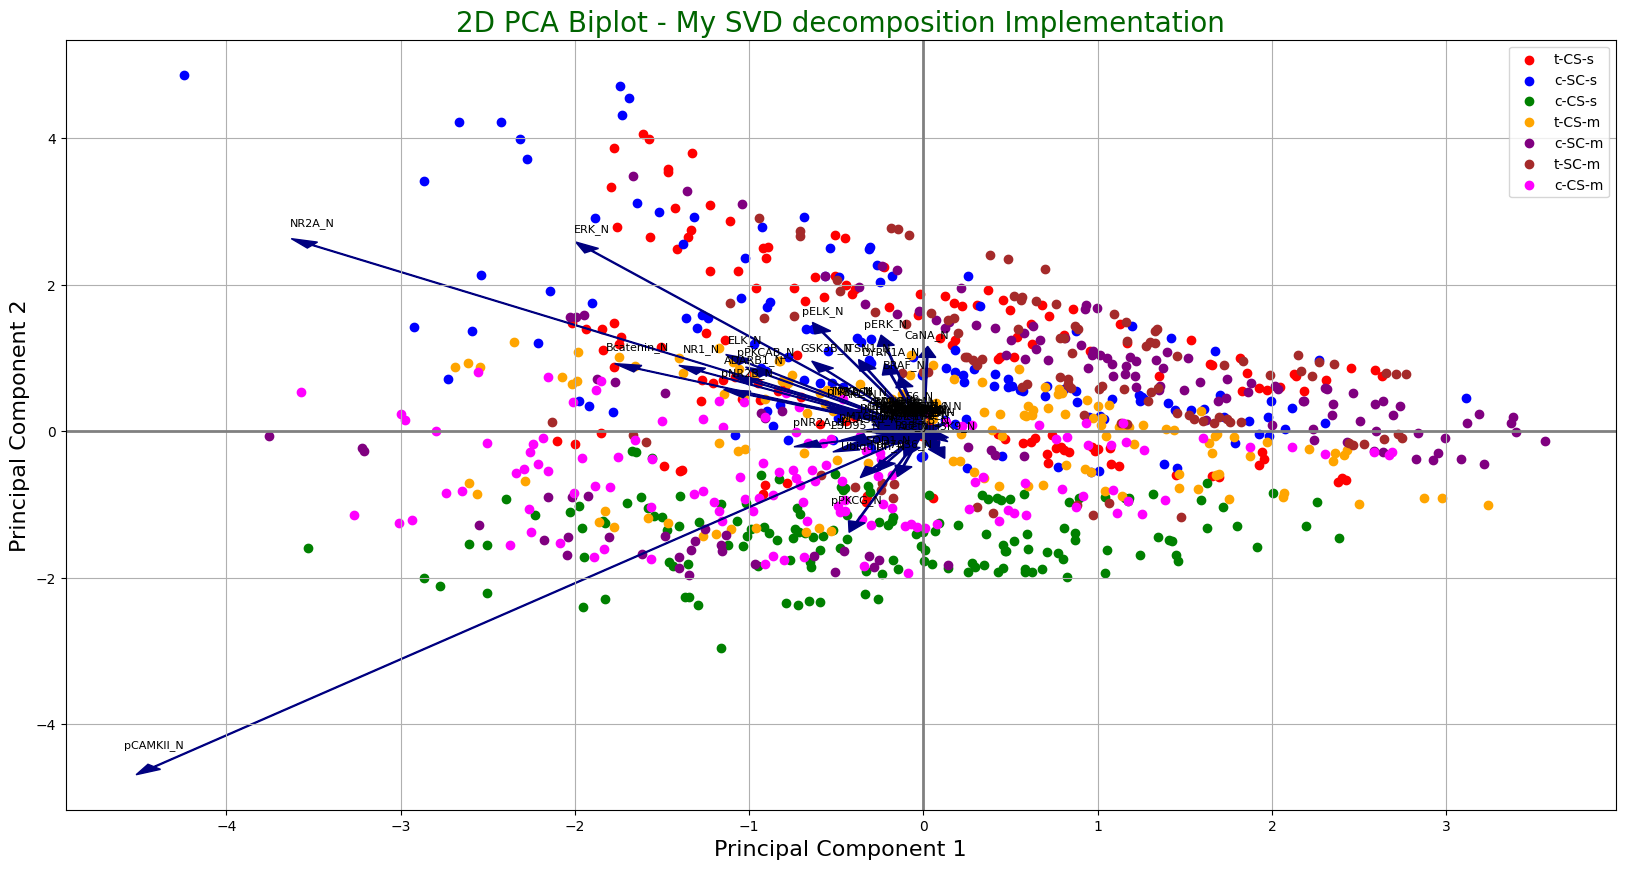

In [37]:

plot_pca_biplot(projected_data_svd, principal_components_svd, features, target_names, y, 'My SVD decomposition')

In [38]:
# Loadings per each principal component as a dataframe

df_loadings_svd =pca_svd.get_feature_loadings(features)
D_sorted_svd =df_loadings_svd.sort_values(by='PC1', key=lambda x: x.abs(), ascending=False)

D_sorted_svd.head(20)

PC1       PC2       PC3       PC4       PC5       PC6  \
pCAMKII_N  -0.648251 -0.672909  0.018338 -0.235858  0.025050  0.172766   
NR2A_N     -0.514948  0.372802 -0.173878  0.104135  0.333609 -0.094893   
ERK_N      -0.279657  0.361600 -0.018171  0.179989 -0.142769  0.162561   
Bcatenin_N -0.240737  0.125083 -0.038948  0.094544 -0.252698 -0.250569   
NR1_N      -0.187539  0.119825 -0.017784  0.061818 -0.098649 -0.166185   
ELK_N      -0.150512  0.138676 -0.013879  0.099513 -0.202575 -0.079756   
pNR2B_N    -0.148689  0.073452 -0.087174  0.033347 -0.063445 -0.032673   
ADARB1_N   -0.142919  0.098356  0.016703  0.190450  0.246154  0.179128   
pPKCAB_N   -0.133245  0.113969  0.518901  0.128638  0.280480  0.078147   
pNR2A_N    -0.087955 -0.025318 -0.093160  0.038795 -0.061821  0.028130   
pELK_N     -0.084857  0.197665  0.089282 -0.565547 -0.127661 -0.249202   
GSK3B_N    -0.081889  0.122040  0.147284 -0.100884 -0.031895 -0.017086   
pNR1_N     -0.062575  0.036318 -0.032459  0.021862 -0.016488 -0.058009   
TRKA_N     -0.060712  0.036153  0.030759  0.030176 -0.059297 -0.021085   
PSD95_N    -0.057042 -0.031237 -0.072327  0.091514 -0.405017  0.175688   
pPKCG_N    -0.056183 -0.181856  0.651906  0.310995 -0.181169 -0.320879   
AKT_N      -0.052846  0.029705 -0.067524  0.012384 -0.054252 -0.083145   
P70S6_N    -0.050453  0.033645 -0.053539  0.032903 -0.225274  0.178413   
pMTOR_N    -0.048339 -0.012738 -0.073588 -0.011769  0.028825 -0.052545   
ITSN1_N    -0.046813  0.122834  0.134844 -0.230362 -0.139153  0.015568   

                 PC7       PC8       PC9      PC10      PC11  
pCAMKII_N  -0.080445 -0.113933  0.021822 -0.076020 -0.039889  
NR2A_N     -0.239816  0.383167 -0.270503  0.170292  0.249806  
ERK_N      -0.094626 -0.529689  0.195851 -0.306615  0.223185  
Bcatenin_N -0.182644  0.040732  0.047402 -0.005784 -0.265399  
NR1_N       0.037364  0.134087  0.270631 -0.036398 -0.246231  
ELK_N       0.036232 -0.356572 -0.050584  0.238397 -0.093981  
pNR2B_N     0.115784  0.081748  0.177035  0.109906 -0.068511  
ADARB1_N    0.607094 -0.021353 -0.442402 -0.327908 -0.164944  
pPKCAB_N    0.200968 -0.009876  0.292607  0.198765 -0.254622  
pNR2A_N     0.184315 -0.035301  0.019924  0.206831 -0.005840  
pELK_N      0.367512 -0.001579  0.103717 -0.050877  0.455316  
GSK3B_N    -0.038729  0.109002  0.034329 -0.118206 -0.132468  
pNR1_N      0.017477  0.018169  0.066234  0.051221 -0.075883  
TRKA_N      0.032136  0.056301  0.080551 -0.124447 -0.030795  
PSD95_N     0.081078  0.458937 -0.019777 -0.245330  0.034164  
pPKCG_N    -0.011140  0.083509 -0.156665  0.039100  0.353256  
AKT_N       0.059907 -0.044369  0.046618 -0.005353  0.004654  
P70S6_N     0.014189 -0.090203 -0.080987  0.215181  0.149424  
pMTOR_N     0.137866  0.003666  0.128723  0.071111 -0.023479  
ITSN1_N    -0.041790 -0.035487 -0.162730  0.013035 -0.142792

Biplot in 2d 
 
 


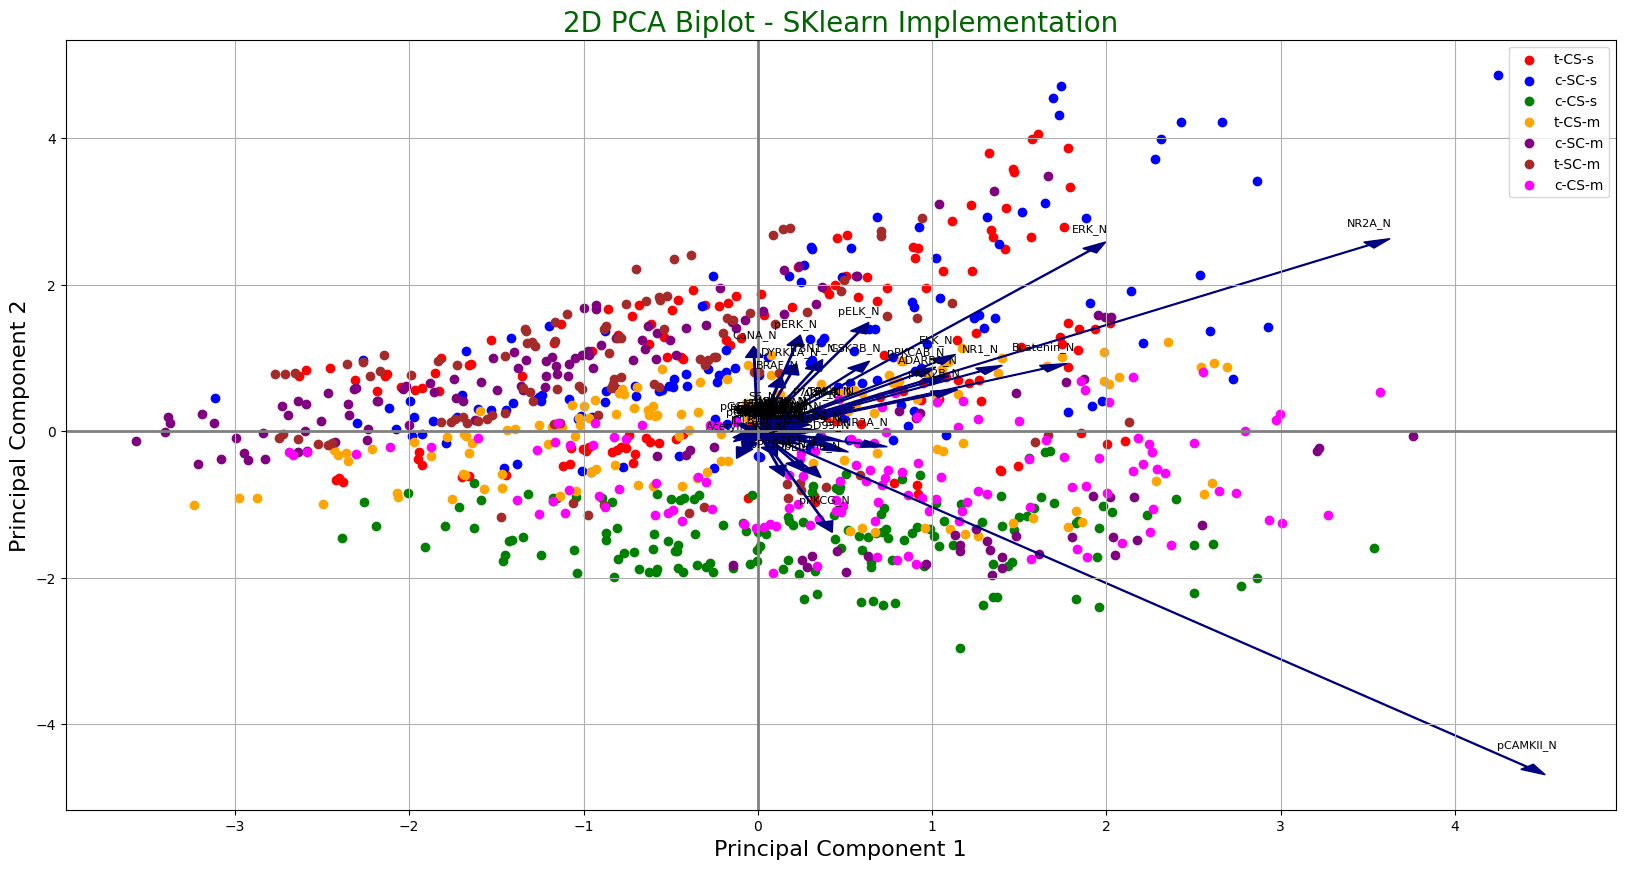

In [39]:
plot_pca_biplot(projected_data_sklearn, principal_sklearn, features, target_names, y, 'SKlearn')


<span style="color:blue; font-size:20px">This function in Python takes the loadings and feature names, then plots the loading vectors. Loadings are the eigenvectors that represent the linear combinations of the original data, where each feature is centered (mean of each feature is subtracted), in both my implementations and the SKLEARN library.</span>


<span style="color:blue; font-size:20px">The loading plot shows the vectors of the first two principal components, which form the new basis of the projected data and are orthogonal, unit vectors. The magnitude (length) of each vector indicates how much each feature contributes to the respective principal component.</span>



In [40]:
# This function in Python takes the loadings and feature names, then plots
# the loading vectors. Loadings are the eigenvectors that represent the
# linear combinations of the original data, where each feature is centered
# (mean of each feature is subtracted), in both my implementations and the
# SKLEARN library.
# The loading plot shows the vectors of the first two principal components,
# which form the new basis of the projected data and are orthogonal, unit vectors.
# The magnitude (length) of each vector indicates how much each feature
# contributes to the respective principal component.


def plot_loading_vectors(loadings, feature_names, implementation_type, scaling_factor=1.0):
    plt.figure(figsize=(18, 10))

    # Plot the loadings (first two principal components)
    for i in range(loadings.shape[0]):
        plt.arrow(0, 0, loadings[i, 0] * scaling_factor, loadings[i, 1] * scaling_factor,
                  head_width=0.02, head_length=0.03, fc='yellow', ec='navy', lw=1.9)
        # Position the text slightly above the arrow
        plt.text(loadings[i, 0] * scaling_factor * 1.05, loadings[i, 1] * scaling_factor * 1.15,
                 feature_names[i], color='red', ha='center', va='center')
    #plt.xlim(-1.2, 1.2)
    #plt.ylim(-1.2, 1.2)
    plt.xlabel("Principal Component 1", c='black', fontsize=17)
    plt.ylabel("Principal Component 2", c='black', fontsize=17)
    plt.title(f"Loading Plot (PCA)- {implementation_type} implementation", c='green', fontsize=19)
    plt.grid()

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.show()


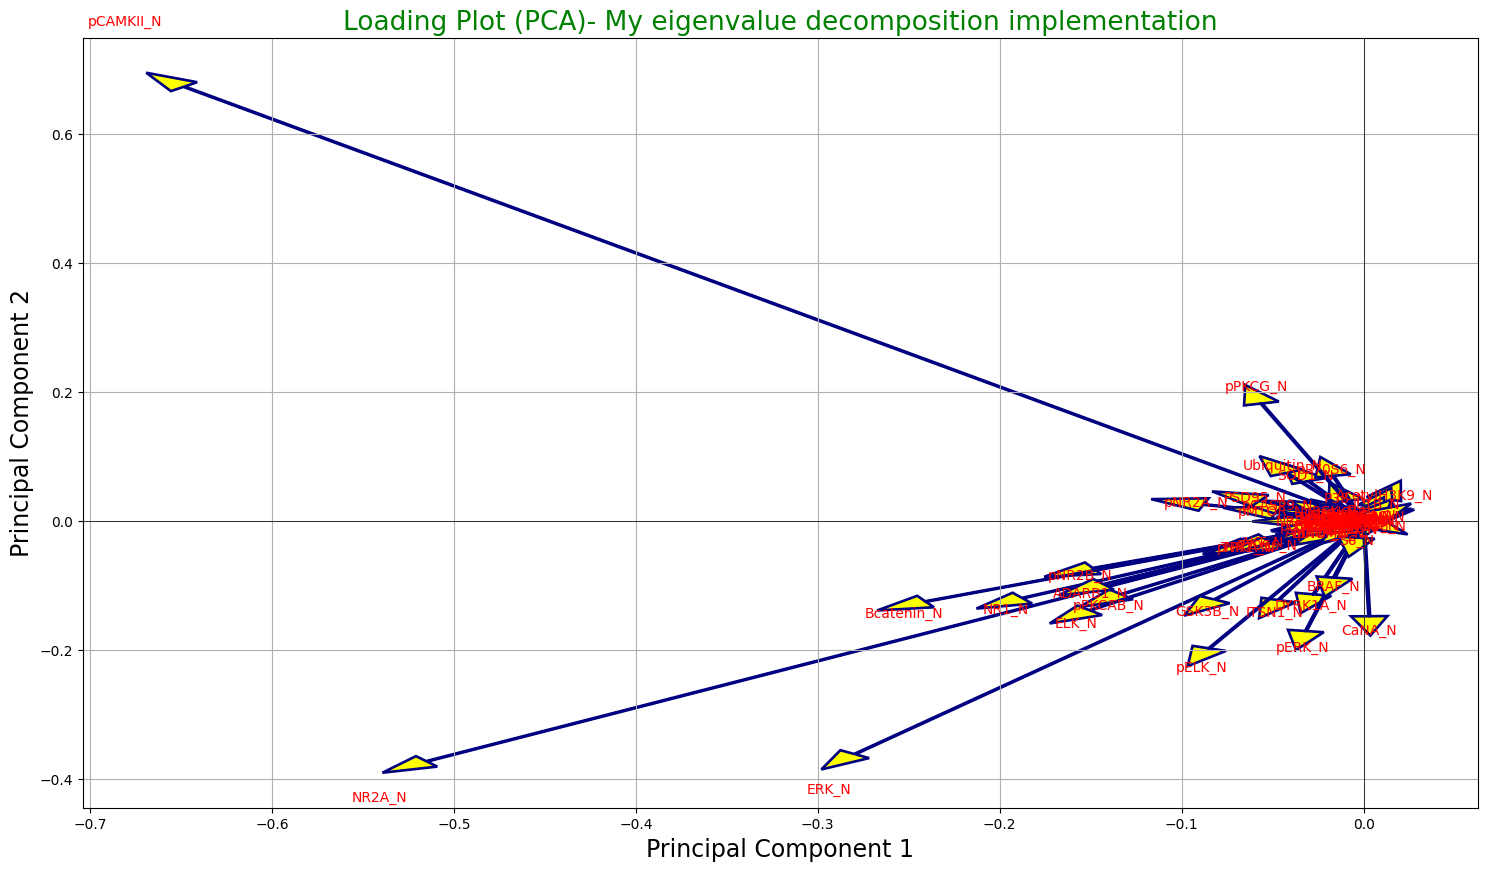

In [41]:
plot_loading_vectors(principal_components_eigen, features,'My eigenvalue decomposition', 1.)

In [42]:




# As we can see in the loading plot, some feature names are easier to read compared to the biplot, where the
# projected data points were also included. Some features do not contribute much to the first and second principal components,
# resulting in very short vectors that overlap and are difficult to distinguish.
# In contrast, we can see that the feature pCAMKII_N contributes the most. NR2A_N, along with ERK_N, Bcatenin_N, NR1_N, ELK_N,
# and a few others (roughly 8-10 features), also contribute to a lesser extent. The rest seem to have minimal or no contribution.
# The vector representing pCAMKII_N forms an angle of roughly 70-110 degrees with the others, indicating that the most
# contributing feature is not highly correlated with the other contributing features in the first two principal components.
# Across all three loading plots, the orientation of my implementations and the SKLEARN library is slightly different,
# but they convey the same insights about the Mice Protein dataset.
#
# Refer to the biplot analysis above for further comparison.



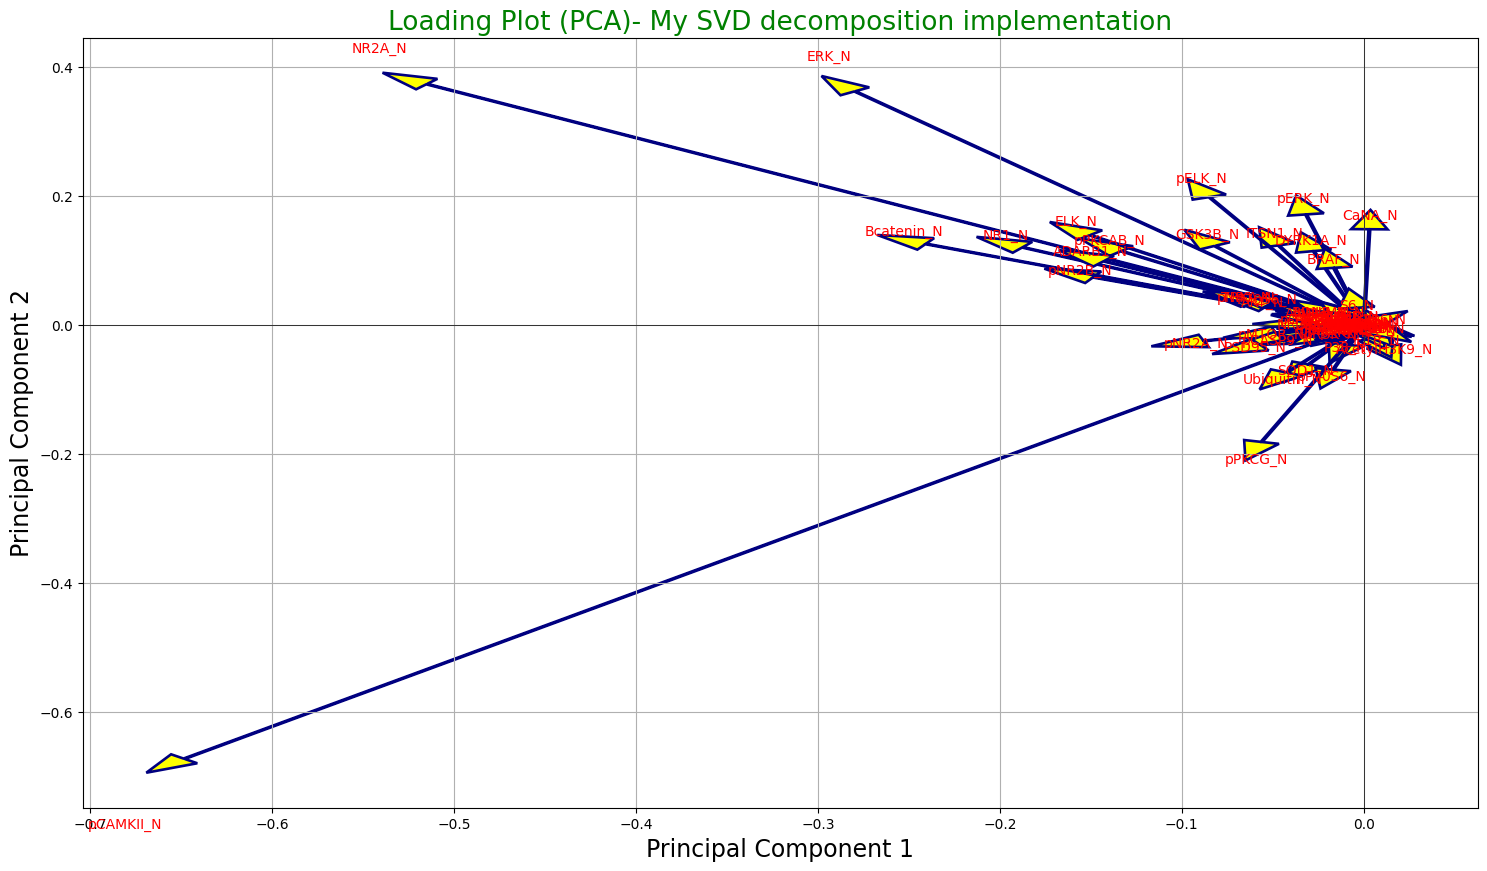

In [43]:
plot_loading_vectors(principal_components_svd, features,'My SVD decomposition', 1.)

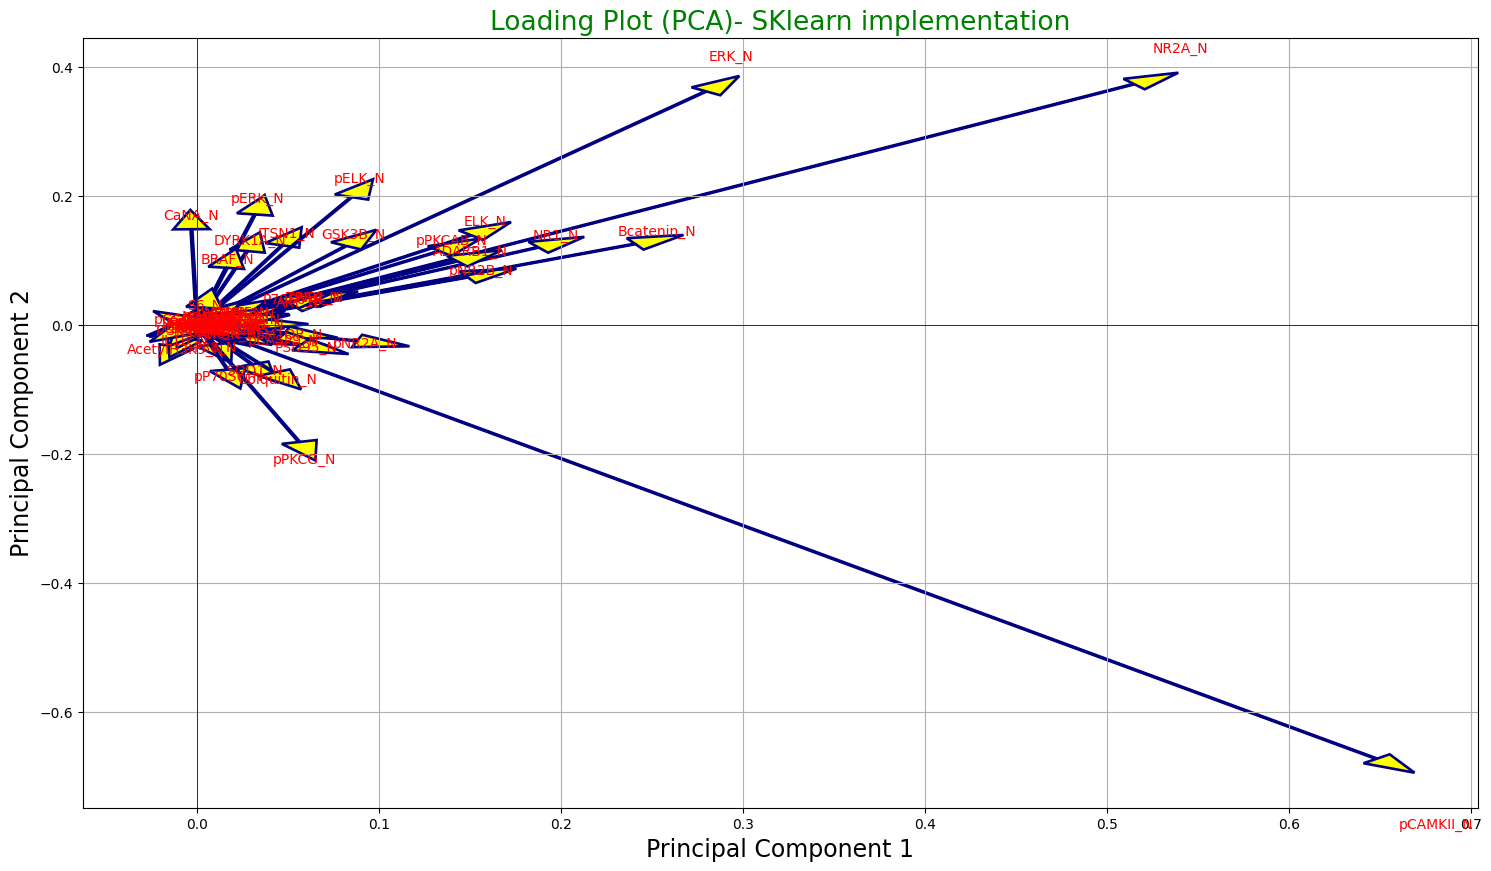

In [44]:
plot_loading_vectors(principal_sklearn, features,'SKlearn', 1.)

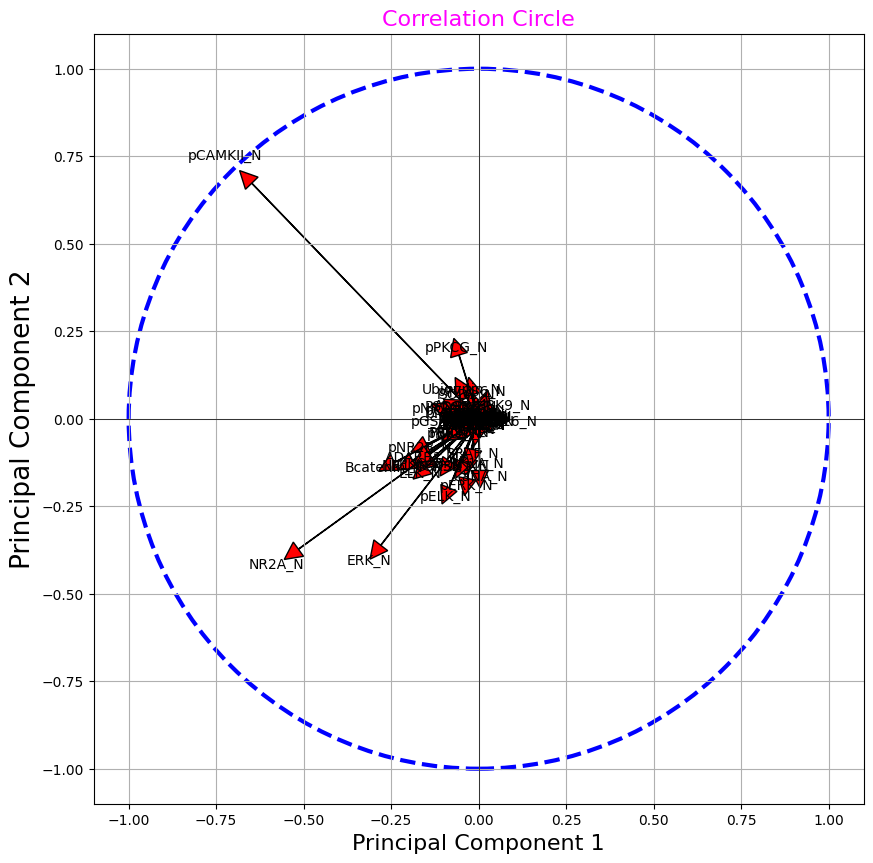

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_circle(U_k, feature_names):
    # U_k is the matrix of loadings (eigenvectors), which represent the contribution of features to each component.
    # We plot the first two principal components here.

    fig, ax = plt.subplots(figsize=(20, 10))

    # Draw a unit circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', lw=3)
    ax.add_artist(circle)

    # Plot the loadings (vectors)
    for i in range(U_k.shape[0]):
        plt.arrow(0, 0, U_k[i, 0], U_k[i, 1], head_width=0.05, head_length=0.05, fc='red', ec='black')
        plt.text(U_k[i, 0] * 1.12, U_k[i, 1] * 1.12, feature_names[i], color='black', ha='center', va='center')


    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Principal Component 1', c ='black', fontsize=16)
    plt.ylabel('Principal Component 2', c ='black', fontsize=19)
    plt.title('Correlation Circle', c ='magenta', fontsize=16)

    # Add grid, origin lines, and aspect ratio
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')

    plt.show()

plot_correlation_circle(principal_components_eigen, features)

In [46]:
# From correlation matrix, we can a cluster with the most variables that do not contribute, call it cluster 1,
#  another cluster of variables with fewer variables slightly contributing with 2 variables NR2A_N and ERK_N contributing the most in that cluster, call it cluster 2.
# In cluster 2, we can see that the vectors have roughly from from 1-50 degrees meaning that variables are positively correlated.
# There is a vector representing variable pCAMKII_N in cluster 1 as an outlier of the other which contributes the most in the two principal components.
# Vector representing pCAMKII_N with cluster 2 creates an angle close to 90 (more or less) degrees meaning that variables in cluster 2 and pCAMKII_N are not correlated


## Plotting the reconstruction error for my eigenvalue decomposition, singular value decomposition implementations, and the SKLEARN library to examine any differences between the methods.

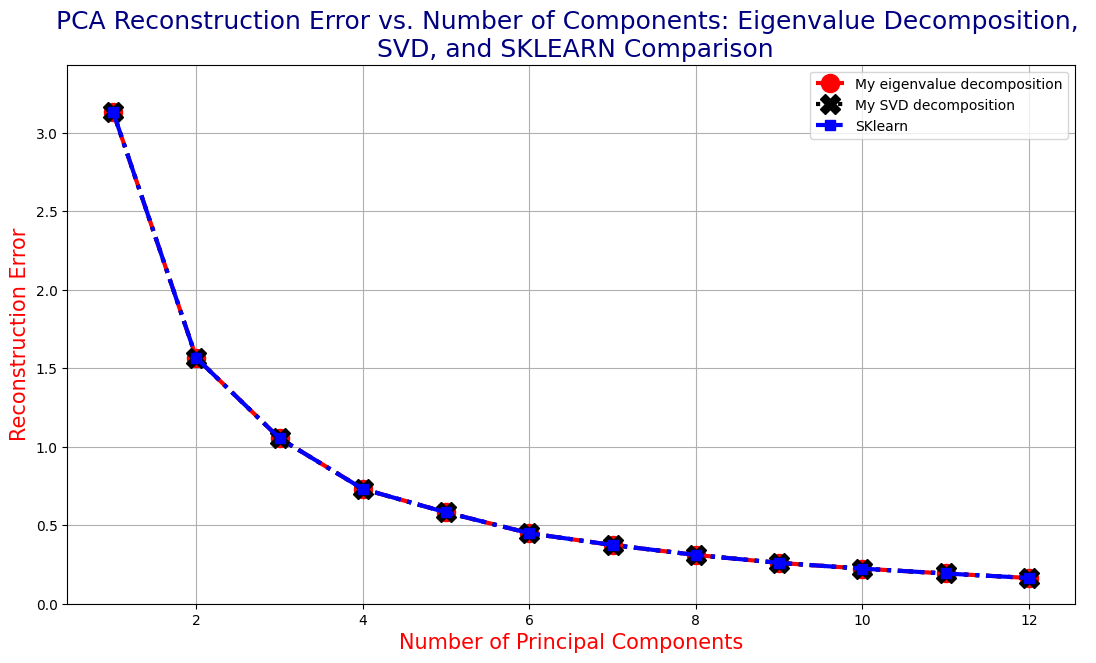

In [47]:
reconstruction_errors_per_k_eigen = []
reconstruction_errors_per_k_svd = []
reconstruction_errors_per_k_sklearn = []



k_max =12
N_capital = X.shape[0]

for k in range(1, k_max+1):
    ob_eigen = Nikolin_PCA_eigen_valuesDecomposition(X.values, k)
    reconstruction_errors_per_k_eigen.append(ob_eigen.output()[4])

    ob_svd = Nikolin_SVD_Decomposition(X.values, k)
    reconstruction_errors_per_k_svd.append(ob_svd.output()[3])




    # Fit PCA and transform the data
    pca = PCA(n_components=k)  # specify number of components
    X_pca = pca.fit_transform(X)

    # Reconstruct the data
    X_reconstructed = pca.inverse_transform(X_pca)

    # Compute reconstruction error
    reconstruction_error_sklearn = (1/N_capital)*np.sum((X.values-X_reconstructed)**2) #np.linalg.norm(X.values-X_reconstructed)#mean_squared_error(X.values, X_reconstructed)
    reconstruction_errors_per_k_sklearn.append(reconstruction_error_sklearn)


# Plot the reconstruction error as a function of the number of components
plt.figure(figsize=(13, 7))
plt.plot(range(1, k_max+1 ) , reconstruction_errors_per_k_eigen, marker='o',
         markersize=13, c='red', lw=3, linestyle='--' ,  label='My eigenvalue decomposition')



plt.plot(range(1, k_max+1 ), reconstruction_errors_per_k_svd, marker='X',
         markersize=15, c='black', lw=3, linestyle=':' ,label = 'My SVD decomposition')




plt.plot(range(1, k_max+1 ), reconstruction_errors_per_k_sklearn, marker='s',
         markersize=7, c='blue', lw=3, linestyle='-.', label='SKlearn')


plt.title('PCA Reconstruction Error vs. Number of Components: Eigenvalue Decomposition, \n SVD, and SKLEARN Comparison', c='navy', fontsize =18)
plt.xlabel('Number of Principal Components', c='red', fontsize =15)
plt.ylabel('Reconstruction Error',c='red', fontsize =15)
plt.grid(True)
plt.legend()
plt.ylim(0, max(reconstruction_errors_per_k_sklearn)+0.3)
plt.show()


# My eigenvalue decomposition implementation vs My SVD decomposition implementation  vs SKlearn library



<span style="color:blue; font-size:40px">Some visualization. It is not directly related to PCA</span>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


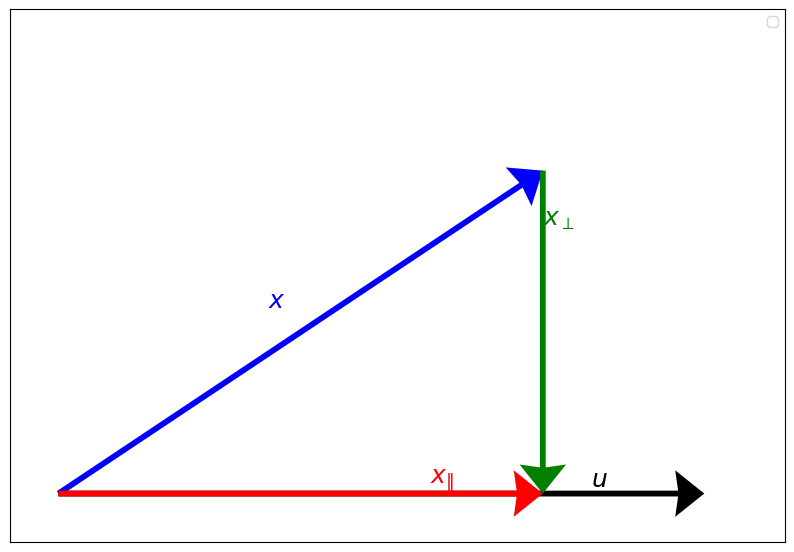

In [48]:
# Define the vectors from the image
plt.figure(figsize=(10, 7))
x = np.array([3, 2])   # vector to be projected
vector1 = np.array([4, 0])


# Compute the projection of x onto vector1
proj_vector1_x = (np.dot(x, vector1) / np.dot(vector1, vector1)) * vector1  # projection of x on u

# Correct the calculation of the perpendicular component
x_perpendicular = x - proj_vector1_x  # perpendicular component of x

# Create the plot
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue',headwidth=8, lw=7)
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='black',headwidth=8, lw=7)
plt.quiver(0, 0, proj_vector1_x[0], proj_vector1_x[1], angles='xy', scale_units='xy', scale=1, color='red', headwidth=8, lw=7)
plt.quiver(x[0], x[1], x_perpendicular[0], -x_perpendicular[1], angles='xy', scale_units='xy', scale=1, color='green', headwidth=8,  lw=7)
plt.xlim(-0.3, 4.5)
plt.ylim(-0.3, 3)
#plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.text(3.3, 0.09, r'$ u $',c ='black', fontsize=18, weight='bold', va='center', rotation=0)
plt.text(1.3, 1.2, r'$ x $',c ='blue', fontsize=18, weight='bold', va='center', rotation=0)
plt.text(2.3, 0.09, r'$ x_\Vert $',c ='r', fontsize=18, weight='bold', va='center', rotation=0)
plt.text(3., 1.7, r'$ x_\perp$',c ='green', fontsize=18, weight='bold', va='center', rotation=0)

# Remove the top and right spines (box)

plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()


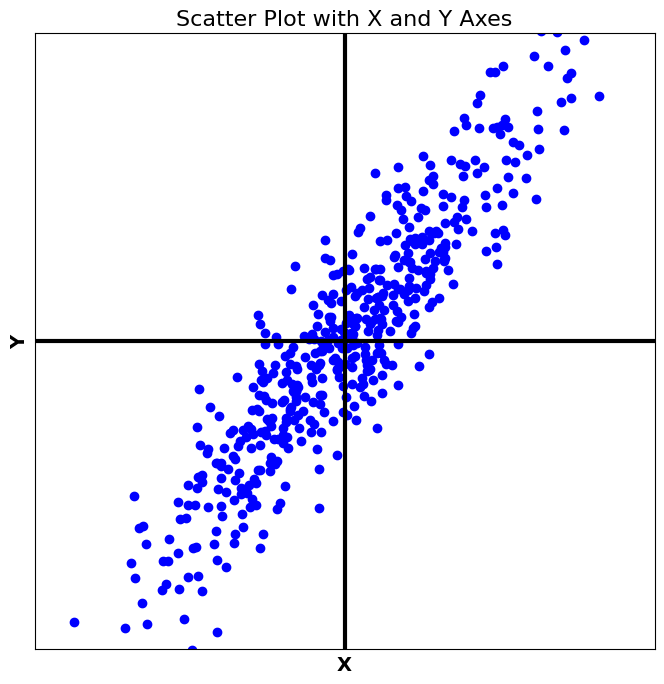

In [49]:

np.random.seed(42)

# Generate random data for X
XX = np.random.randn(500)

# Generate linearly correlated data for Y with some noise
YY = 1.2 * XX + np.random.normal(0, 0.5, 500)

plt.figure(figsize=(8, 8))

# Scatter plot for the data
plt.scatter(XX, YY, color='blue')


plt.axhline(0, color='black',linewidth=3)
plt.axvline(0, color='black',linewidth=3)

plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')
plt.title('Scatter Plot with X and Y Axes', fontsize=16)

# Set limits to center the plot around the origin
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xticks([])
plt.yticks([])

# Show plot
plt.grid(False)  # Turn off the grid for a clean look
plt.show()

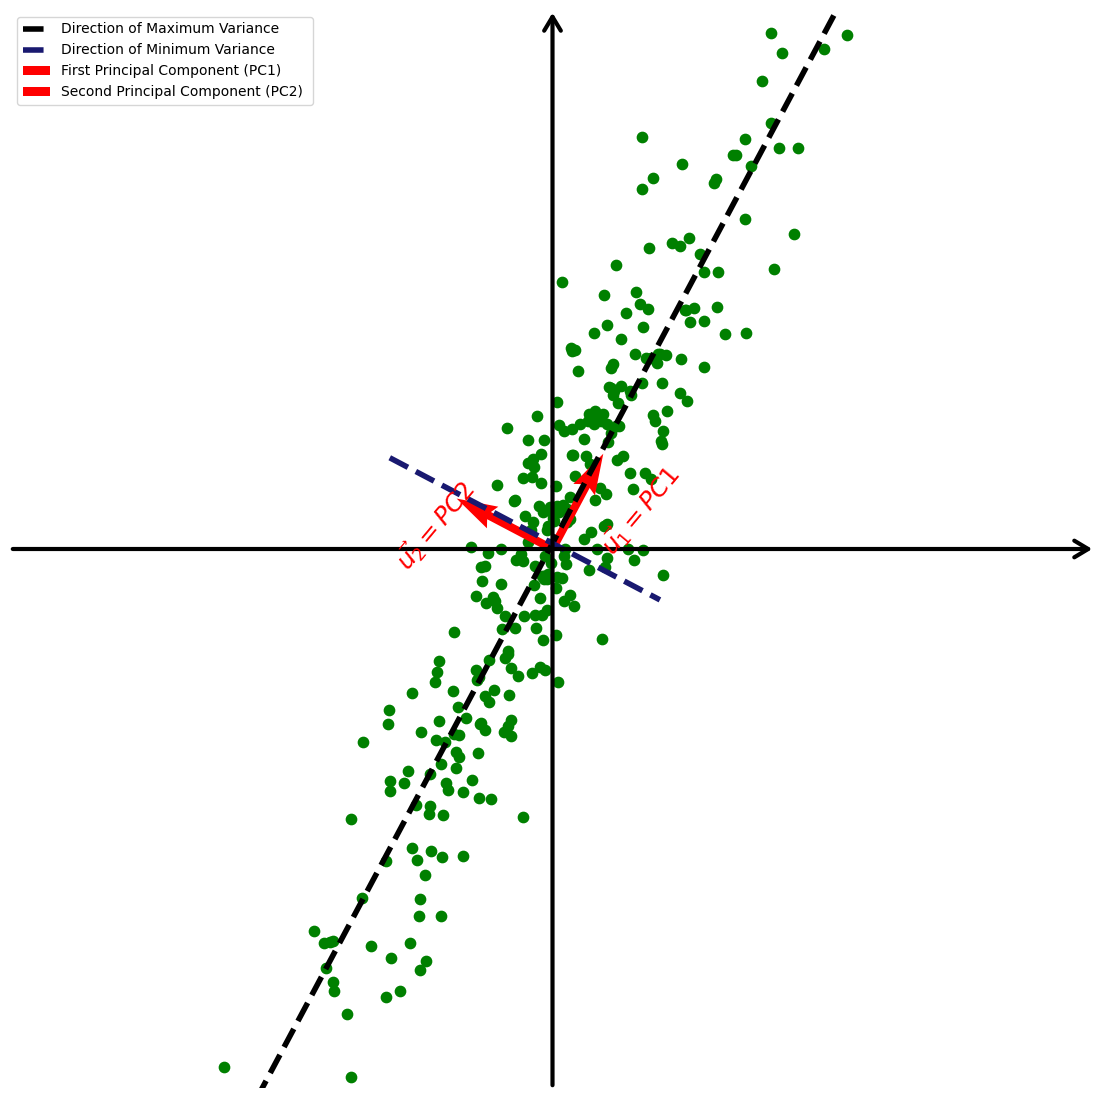

In [50]:
np.random.seed(43)

# Generate random data for X
X = np.random.randn(300)
# Generate linearly correlated data for Y with some noise
Y = 1.8 * X + np.random.normal(0, 0.8, 300)


model_reg = LinearRegression().fit(X.reshape(-1, 1), Y)

slope = model_reg.coef_[0]
intercept = model_reg.intercept_
x_plot = np.arange(min(X), max(X), step = 0.01)
Y_plot = slope * x_plot + intercept


x0 = 0  # x-coordinate of the intersection point
y0 = slope*x0 + intercept  # y-coordinate of the intersection point, which is f(x0)

b_prime = slope * x0 + intercept + x0 / slope

x_orthogonal = np.arange(x0-1.5, x0+1, step=0.01)
g = lambda x: (-1/slope) * x +b_prime  # slope of the orthogonal line
yy_plot = g(x_orthogonal)





fig, ax = plt.subplots(figsize=(14, 14))
ax.scatter(X, Y, s=55,  c='green')#color='midnightblue')

ax.plot(x_plot, Y_plot, '--', color='black', lw=4, label=r'Direction of Maximum Variance')

ax.plot(x_orthogonal ,  yy_plot, '--', color='midnightblue', lw=4, label=r'Direction of Minimum Variance')

## Add X and Y axes with arrows
ax.annotate('', xy=(5, 0), xytext=(-5, 0),
            arrowprops=dict(arrowstyle='->,head_width=0.6,head_length=1.0', lw=3,  color='black'))
ax.annotate('', xy=(0, 5), xytext=(0, -5),
            arrowprops=dict(arrowstyle='->,head_width=0.6,head_length=1.0', lw=3, color='black'))

# Set labels
#plt.text(4.1, -0.5, 'X', fontsize=14, weight='bold', ha='center')
#plt.text(-0.5, 4.1, 'Y', fontsize=14, weight='bold', va='center')

#plt.text(2.3, 4.3, r'$\lambda_1 \cdot \vec{u_1}$', fontsize=18, weight='bold', va='center', rotation=50)
#plt.text(-2., 1, r'$\lambda_2 \cdot \vec{u_2}$', fontsize=18, weight='bold', va='center', rotation=50)

#plt.text(2.3, 4.3, 'PC1', fontsize=18, weight='bold', va='center', rotation=50)
#plt.text(-2., 1, 'PC2', fontsize=18, weight='bold', va='center', rotation=50)

plt.text(0.39, 0.36, r'$ \vec{u_1}=PC1$', c= 'r', fontsize=18, weight='bold', va='center', rotation=50)
plt.text(-1.5, 0.22, r'$\vec{u_2} = PC2$',c ='r', fontsize=18, weight='bold', va='center', rotation=50)



magnitude = np.sqrt(1 + slope**2)
unit_vector_x = 1 / magnitude
unit_vector_y = slope / magnitude
ax.quiver(0, 0, unit_vector_x, unit_vector_y, angles='xy', scale_units='xy', scale=1, color='red', label='First Principal Component (PC1) ')

ax.quiver(0, 0, -unit_vector_y, unit_vector_x, angles='xy', scale_units='xy', scale=1, color='red', label='Second Principal Component (PC2) ')





# Remove the top and right spines (box)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.axis('off')

# Set limits to center the plot around the origin
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xticks([])
plt.yticks([])
fig.savefig('ims.jpg')
ax.legend()


plt.grid(False)
plt.show()